In [508]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)

from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("finpro.csv") 

In [3]:
df.drop("customerID",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 ### Convert TotalCharges to numeric

In [7]:
#Identifying the rows containing missing data
missing_value_row = list(df[df['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [8]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    df['TotalCharges'][missing_row] = 0

In [9]:
df['TotalChargesNum']= pd.to_numeric(df['TotalCharges'])


In [10]:
df.drop("TotalCharges",axis=1,inplace=True)

## UNIQUE VALUE COLUMNS

In [11]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn : ['No' 'Yes

In [12]:
# CHURN VALUE COUNT

In [13]:
df2 = df.copy()

In [14]:
le = LabelEncoder()
le_count = 0
for col in df2.columns[0:]:
    if df2[col].dtype == 'object':
        if len(list(df2[col].unique())) <= 2:
            le.fit(df2[col])
            df2[col] = le.transform(df2[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [15]:
df2 = pd.get_dummies(df2)

## LOGISTIC REGRESSION

In [16]:
df_LR = df2.copy()

In [17]:
x_LR = df_LR.drop(["Churn"],axis=1)
y_LR = df_LR["Churn"]

## All Feature without Parameter Tuning and NO Scalling Spliting data train 90

In [18]:
xLR_train, xLR_test, yLR_train, yLR_test = train_test_split(x_LR, y_LR, test_size = 0.1, random_state = 0)

In [19]:

modelLR = LogisticRegression()

modelLR.fit(xLR_train,yLR_train)

LogisticRegression()

In [20]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(modelLR, xLR_train, yLR_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [21]:
y_predLR = modelLR.predict(xLR_test)

### Evaluating Model 

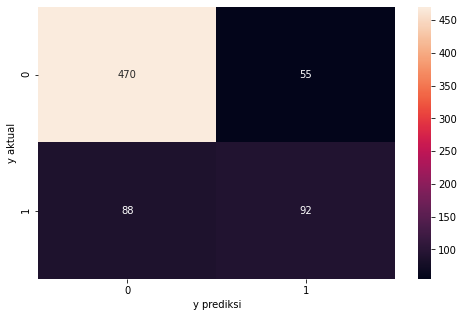

In [22]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLR),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

### Evaluation metrics report 


In [23]:
print(classification_report(yLR_test,y_predLR))

precision    recall  f1-score   support

           0       0.84      0.90      0.87       525
           1       0.63      0.51      0.56       180

    accuracy                           0.80       705
   macro avg       0.73      0.70      0.72       705
weighted avg       0.79      0.80      0.79       705



In [24]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.716312
recall,51.111111
precission,62.585034
roc_auc_score,70.317460
F1 Score,56.269113


## All Feature without Parameter Tuning and NO Scalling Spliting data train 80

In [25]:
x_LR1 = df_LR.drop(["Churn"],axis=1)
y_LR1 = df_LR["Churn"]

In [26]:
xLR1_train, xLR1_test, yLR1_train, yLR1_test = train_test_split(x_LR1, y_LR1, test_size = 0.2, random_state = 0)

In [27]:
modelLR1 = LogisticRegression()

modelLR1.fit(xLR1_train,yLR1_train)

LogisticRegression()

In [28]:
y_predLR1 = modelLR1.predict(xLR1_test)

In [29]:
# 10 Folds Cross Validation 
clf_scoreLR1 = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [30]:
confusion_matrix(yLR1_test,y_predLR1)

array([[934, 107],
       [179, 189]])

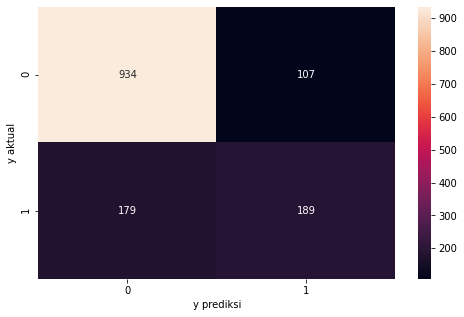

In [31]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLR1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [32]:
print(classification_report(yLR1_test,y_predLR1))

precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [33]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.701916
recall,51.358696
precission,63.851351
roc_auc_score,70.540059
F1 Score,56.927711


### All Feature with Parameter Tuning RS and NO Scalling Spliting data train 90

In [34]:
modelLRRStun = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 100)

modelLRRStun.fit(xLR_train,yLR_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [35]:
y_predLRRStun= modelLRRStun.predict(xLR_test)

In [36]:
# 10 Folds Cross Validation 
clf_scoreLRRS = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [37]:
confusion_matrix(yLR_test,y_predLRRStun)

array([[473,  52],
       [ 90,  90]])

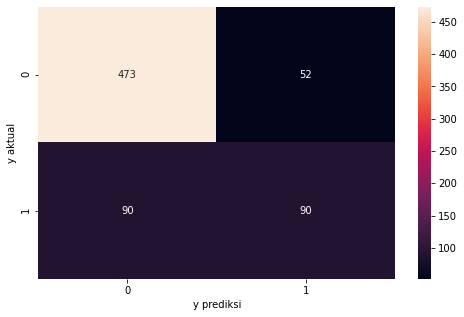

In [38]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLRRStun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [39]:
print(classification_report(yLR_test,y_predLRRStun))

precision    recall  f1-score   support

           0       0.84      0.90      0.87       525
           1       0.63      0.50      0.56       180

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.79      0.80      0.79       705



In [40]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLRRStun)*100,recall_score(yLR_test,y_predLRRStun)*100,precision_score(yLR_test,y_predLRRStun)*100,roc_auc_score(yLR_test,y_predLRRStun)*100,f1_score(yLR_test,y_predLRRStun)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)


,Score (%)
accuracy,79.858156
recall,50.000000
precission,63.380282
roc_auc_score,70.047619
F1 Score,55.900621


### All Feature with Parameter Tuning RS and NO Scalling Spliting data train 90

In [41]:
modelLRRStun80 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 1000)

modelLRRStun80.fit(xLR1_train,yLR1_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [42]:
y_predLRRStun80= modelLRRStun80.predict(xLR1_test)

In [43]:
# 10 Folds Cross Validation 
clf_scoreLRRS80 = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [44]:
confusion_matrix(yLR1_test,y_predLRRStun80)

array([[931, 110],
       [175, 193]])

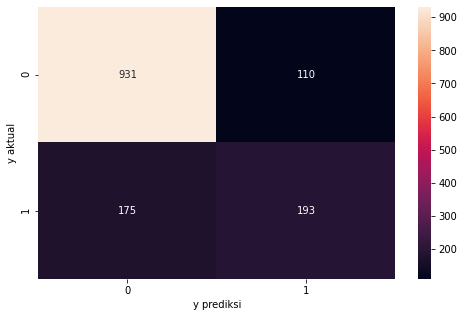

In [45]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLRRStun80),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [46]:
print(classification_report(yLR1_test,y_predLRRStun80))

precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [47]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLRRStun80)*100,recall_score(yLR1_test,y_predLRRStun80)*100,precision_score(yLR1_test,y_predLRRStun80)*100,roc_auc_score(yLR1_test,y_predLRRStun80)*100,f1_score(yLR1_test,y_predLRRStun80)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.772889
recall,52.445652
precission,63.696370
roc_auc_score,70.939445
F1 Score,57.526080


- Kami mencoba hyperparameter tuning menggunakan Grid Search CV Mendapatkan Hesil Yang sama dengan menggunakan Random Search CV

## Logreg All Feature with scalling 

In [48]:
df2_Scal = df2.copy()

- Karenaa Sesuai Hasil EDA bawha di dalam data kami ada beberapa feature yang skalanya berbeda dengan feature yang lain, maka kita akan lakukan scalling, dan karena data kami setelah kita check pada EDA tidak mempunyai outlier makan kami akan menggunakan MinMAx Scaller dengan range yang menyerupai feature yang lain yaitu 0-5

In [49]:
scaler = MinMaxScaler(feature_range=(0, 5))
Churn_col = list(df2_Scal.columns)
Churn_col.remove("Churn")
for col in Churn_col:
    df2_Scal[col] = df2_Scal[col].astype(float)
    df2_Scal[[col]] = scaler.fit_transform(df2_Scal[[col]])
df2_Scal["Churn"] = pd.to_numeric(df2_Scal["Churn"], downcast='float')
df2_Scal

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalChargesNum,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,5.0,0.0,0.069444,0.0,5.0,0.577114,0.0,0.017185,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
1,5.0,0.0,0.0,0.0,2.361111,5.0,0.0,1.925373,0.0,1.087820,...,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
2,5.0,0.0,0.0,0.0,0.138889,5.0,5.0,1.771144,1.0,0.062264,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
3,5.0,0.0,0.0,0.0,3.125000,0.0,0.0,1.196517,0.0,1.059754,...,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.138889,5.0,5.0,2.609453,1.0,0.087308,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5.0,0.0,5.0,5.0,1.666667,5.0,5.0,3.310945,0.0,1.145968,...,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
7039,0.0,0.0,5.0,5.0,5.000000,5.0,5.0,4.226368,0.0,4.238958,...,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
7040,0.0,0.0,5.0,5.0,0.763889,0.0,5.0,0.564677,0.0,0.199458,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
7041,5.0,5.0,5.0,0.0,0.277778,5.0,5.0,2.793532,1.0,0.176515,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0


## Splitting Scalling data

In [50]:
x_LR_Scal = df2_Scal.drop(["Churn"],axis=1)
y_LR_Scal = df2_Scal["Churn"]

In [51]:
x_LR_Scal1 = df2_Scal.drop(["Churn"],axis=1)
y_LR_Scal1 = df2_Scal["Churn"]

In [52]:
# #Scalling All feature Train/Test
xLRScal_train, xLRScal_test, yLRScal_train, yLRScal_test = train_test_split(x_LR_Scal, y_LR_Scal, test_size = 0.1, random_state = 0)
xLRScal1_train, xLRScal1_test, yLRScal1_train, yLRScal1_test = train_test_split(x_LR_Scal1, y_LR_Scal1, test_size = 0.2, random_state = 0)



#Scalling model all feature
modelLRScal = LogisticRegression()
modelLRScal1 = LogisticRegression()



#Fitting model scalling all feature 
modelLRScal.fit(xLRScal_train,yLRScal_train)
modelLRScal1.fit(xLRScal1_train,yLRScal1_train)


LogisticRegression()

### All Feature without Parameter Tuning with Scalling Spliting data train 90

In [53]:
y_predLRScal = modelLRScal.predict(xLRScal_test)


In [54]:
# 10 Folds Cross Validation 
clf_scoreLRScal90 = cross_val_score(modelLRScal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [55]:
confusion_matrix(yLRScal_test,y_predLRScal)

array([[472,  53],
       [ 89,  91]])

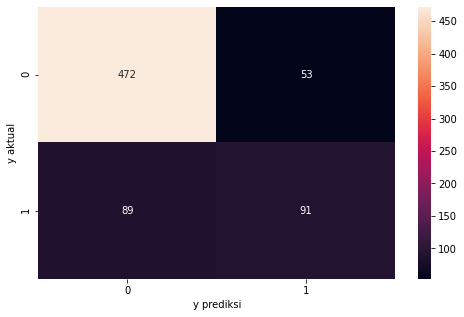

In [56]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [57]:
print(classification_report(yLRScal_test,y_predLRScal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       525
         1.0       0.63      0.51      0.56       180

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.72       705
weighted avg       0.79      0.80      0.79       705



In [58]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
          

,Score (%)
accuracy,79.858156
recall,50.555556
precision,63.194444
roc_auc_score,70.230159
f1_score,56.172840


### All Feature without Parameter Tuning  with Scalling Spliting data train 80

In [59]:
y_predLRScal1 = modelLRScal1.predict(xLRScal1_test)

In [60]:
# 10 Folds Cross Validation 
clf_scoreLRScal80 = cross_val_score(modelLRScal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

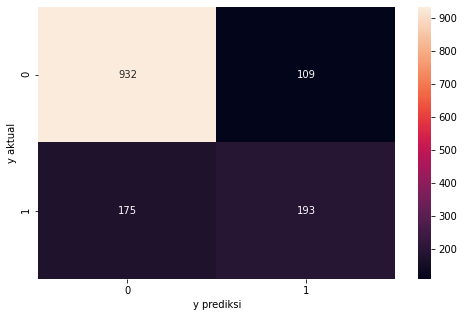

In [61]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [62]:
print(classification_report(yLRScal1_test,y_predLRScal1))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1041
         1.0       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [63]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
          

,Score (%)
accuracy,79.843861
recall,52.445652
precision,63.907285
roc_auc_score,70.987475
f1_score,57.611940


### All Feature with Parameter Tuning RS with Scalling Spliting data train 90

In [64]:
model_LogReg_RS_Scal = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 1000)
model_LogReg_RS_Scal.fit(xLRScal_train, yLRScal_train)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [65]:
y_predLRRSScal = model_LogReg_RS_Scal.predict(xLRScal_test)

In [66]:
# 10 Folds Cross Validation 
clf_scoreLRRSScal90 = cross_val_score(model_LogReg_RS_Scal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

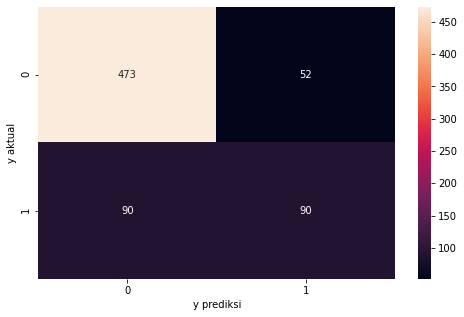

In [67]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRRSScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [68]:
print(classification_report(yLRScal_test,y_predLRRSScal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       525
         1.0       0.63      0.50      0.56       180

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.79      0.80      0.79       705



In [69]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

,Score (%)
accuracy,79.858156
recall,50.000000
precision,63.380282
roc_auc_score,70.047619
f1_score,55.900621


### All Feature with Parameter Tuning RS with Scalling Spliting data train 80

In [70]:
model_LogReg_RS_Scal1 = LogisticRegression(solver='newton-cg', penalty = 'l2', max_iter = 100)
model_LogReg_RS_Scal1.fit(xLRScal1_train, yLRScal1_train)

LogisticRegression(solver='newton-cg')

In [71]:
y_predLRRSScal1 = model_LogReg_RS_Scal1.predict(xLRScal1_test)

In [72]:
# 10 Folds Cross Validation 
clf_scoreLRRSScal80 = cross_val_score(model_LogReg_RS_Scal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

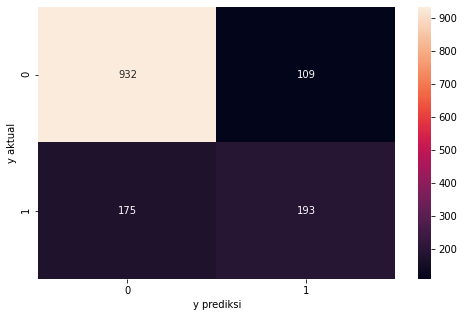

In [73]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRRSScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [74]:
print(classification_report(yLRScal1_test,y_predLRRSScal1))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1041
         1.0       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [75]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRRSScal1)*100, recall_score(yLRScal1_test, y_predLRRSScal1)*100,
                    precision_score(yLRScal1_test, y_predLRRSScal1)*100, roc_auc_score(yLRScal1_test, y_predLRRSScal1)*100,
                    f1_score(yLRScal1_test, y_predLRRSScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

,Score (%)
accuracy,79.843861
recall,52.445652
precision,63.907285
roc_auc_score,70.987475
f1_score,57.611940


### All Feature with Parameter Tuning GS with Scalling Spliting data train 90

In [76]:
model_LogReg_GS_Scal = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 100)
model_LogReg_GS_Scal.fit(xLRScal_train, yLRScal_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [77]:
# 10 Folds Cross Validation 
clf_scoreLRGSScal = cross_val_score(model_LogReg_GS_Scal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [78]:
y_predLRGSScal = model_LogReg_GS_Scal.predict(xLRScal_test)

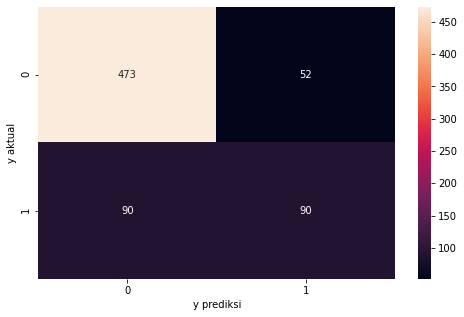

In [79]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRGSScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [80]:
print(classification_report(yLRScal_test,y_predLRGSScal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       525
         1.0       0.63      0.50      0.56       180

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.79      0.80      0.79       705



In [81]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRGSScal)*100, recall_score(yLRScal_test, y_predLRGSScal)*100,
                    precision_score(yLRScal_test, y_predLRGSScal)*100, roc_auc_score(yLRScal_test, y_predLRGSScal)*100,
                    f1_score(yLRScal_test, y_predLRGSScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

,Score (%)
accuracy,79.858156
recall,50.000000
precision,63.380282
roc_auc_score,70.047619
f1_score,55.900621


 - All Feature with Parameter Tuning GS with Scalling Spliting data train 80 have a same parameter with 90

# Model Test With Feature Selection

## Feature Selection Without Parameter Tuning without Scalling Train 90

- Dari hasil feature selection pada notebook yang berbeda kami simpulkan akan hanya memakai beberapa feature terbaik

In [82]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalChargesNum,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,29.85,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,108.15,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,1,151.65,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,1990.50,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,0,7362.90,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,0,346.45,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,1,306.60,...,1,0,0,1,0,0,0,0,0,1


In [83]:
xsel = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
ysel = df2["Churn"]

In [84]:
xa_train, xa_test, ya_train, ya_test = train_test_split(xsel, ysel, test_size = 0.1, random_state = 0)

xb_train, xb_test, yb_train, yb_test = train_test_split(xsel, ysel, test_size = 0.2, random_state = 0)

In [85]:
modelsel = LogisticRegression()
modelselb = LogisticRegression()
modelsel.fit(xa_train,ya_train)
modelselb.fit(xb_train,yb_train)

LogisticRegression()

In [86]:
# 10 Folds Cross Validation 
clf_scoresel90 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [87]:
y_predsel = modelsel.predict(xa_test)

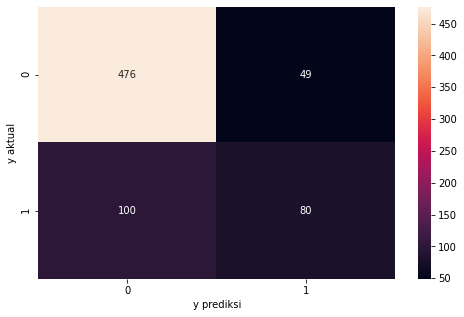

In [88]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [89]:
print(classification_report(ya_test,y_predsel))

precision    recall  f1-score   support

           0       0.83      0.91      0.86       525
           1       0.62      0.44      0.52       180

    accuracy                           0.79       705
   macro avg       0.72      0.68      0.69       705
weighted avg       0.77      0.79      0.78       705



In [90]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predsel)*100, recall_score(ya_test, y_predsel)*100,
                    precision_score(ya_test, y_predsel)*100, roc_auc_score(ya_test, y_predsel)*100,
                    f1_score(ya_test, y_predsel)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,78.865248
recall,44.444444
precision,62.015504
roc_auc_score,67.555556
f1_score,51.779935


## Feature Selection Without Parameter Tuning without Scalling Train 80

In [91]:
y_predselb = modelselb.predict(xb_test)

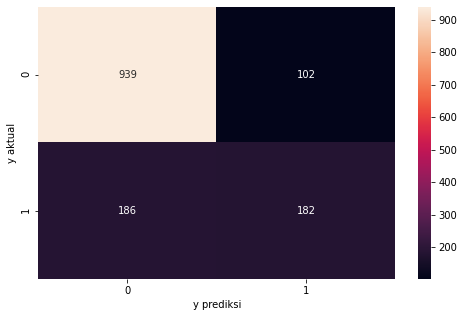

In [92]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predselb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [93]:
print(classification_report(yb_test,y_predselb))

precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.64      0.49      0.56       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [94]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predselb)*100, recall_score(yb_test, y_predselb)*100,
                    precision_score(yb_test, y_predselb)*100, roc_auc_score(yb_test, y_predselb)*100,
                    f1_score(yb_test, y_predselb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.559972
recall,49.456522
precision,64.084507
roc_auc_score,69.829125
f1_score,55.828221


## Feature Selection Parameter Tuning Random Search without Scalling Train 90

In [95]:
modelseltun = LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 1000)
modelselbtun = LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 10000)
modelseltun.fit(xa_train,ya_train)
modelselbtun.fit(xb_train,yb_train)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [96]:
# 10 Folds Cross Validation 
clf_scoreseltun90 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [97]:
y_predseltun = modelseltun.predict(xa_test)

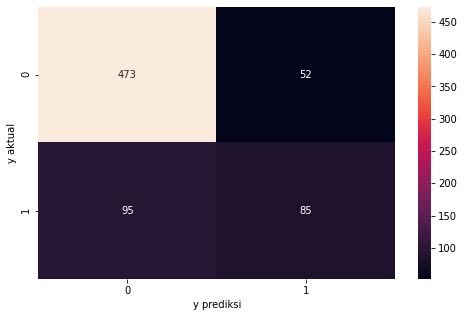

In [98]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predseltun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [99]:
print(classification_report(ya_test,y_predseltun))

precision    recall  f1-score   support

           0       0.83      0.90      0.87       525
           1       0.62      0.47      0.54       180

    accuracy                           0.79       705
   macro avg       0.73      0.69      0.70       705
weighted avg       0.78      0.79      0.78       705



In [100]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predseltun)*100, recall_score(ya_test, y_predseltun)*100,
                    precision_score(ya_test, y_predseltun)*100, roc_auc_score(ya_test, y_predseltun)*100,
                    f1_score(ya_test, y_predsel)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.148936
recall,47.222222
precision,62.043796
roc_auc_score,68.658730
f1_score,51.779935


## Feature Selection Parameter Tuning Random Search without Scalling Train 80

In [101]:
# 10 Folds Cross Validation 
clf_scoreseltun80 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [102]:
y_predseltunb = modelselbtun.predict(xb_test)

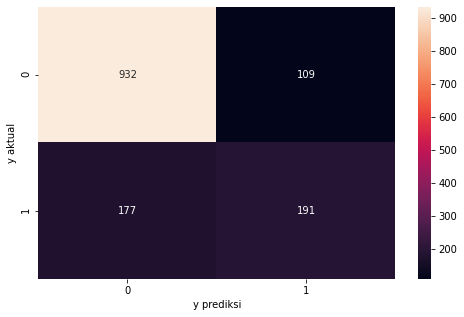

In [103]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predseltunb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [104]:
print(classification_report(yb_test,y_predseltunb))

precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [105]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predseltunb)*100, recall_score(yb_test, y_predseltunb)*100,
                    precision_score(yb_test, y_predseltunb)*100, roc_auc_score(yb_test, y_predseltunb)*100,
                    f1_score(yb_test, y_predselb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.701916
recall,51.902174
precision,63.666667
roc_auc_score,70.715736
f1_score,55.828221


## Feature Selection Parameter Tuning Grid Search without Scalling Train 90

In [106]:
modelselGS = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)

modelselGS.fit(xa_train,ya_train)


LogisticRegression(penalty='none')

In [107]:
# 10 Folds Cross Validation 
clf_scoreselGS = cross_val_score(modelselGS, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [108]:
y_predselGS = modelselGS.predict(xa_test)

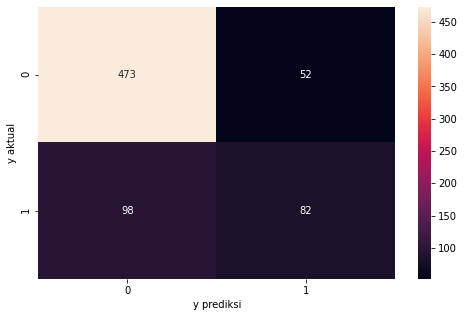

In [109]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predselGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [110]:
print(classification_report(ya_test,y_predselGS))

precision    recall  f1-score   support

           0       0.83      0.90      0.86       525
           1       0.61      0.46      0.52       180

    accuracy                           0.79       705
   macro avg       0.72      0.68      0.69       705
weighted avg       0.77      0.79      0.78       705



In [111]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predselGS)*100, recall_score(ya_test, y_predselGS)*100,
                    precision_score(ya_test, y_predselGS)*100, roc_auc_score(ya_test, y_predselGS)*100,
                    f1_score(ya_test, y_predselGS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,78.723404
recall,45.555556
precision,61.194030
roc_auc_score,67.825397
f1_score,52.229299


## Feature Selection Parameter Tuning Grid Search without Scalling Train 80

In [112]:
modelselGS1 = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)

modelselGS1.fit(xb_train,yb_train)

LogisticRegression(penalty='none')

In [113]:
# 10 Folds Cross Validation 
clf_scoreselGS80 = cross_val_score(modelselGS1, xb_train, yb_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [114]:
y_predselGS1 = modelselGS1.predict(xb_test)

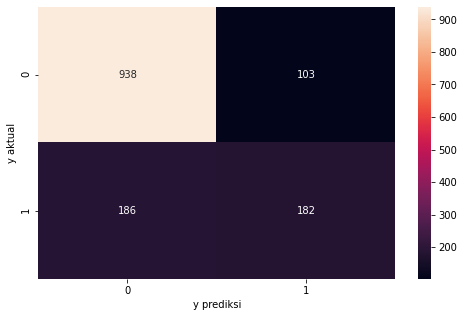

In [115]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predselGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [116]:
print(classification_report(yb_test,y_predselGS1))

precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.64      0.49      0.56       368

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [117]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predselGS1)*100, recall_score(yb_test, y_predselGS1)*100,
                    precision_score(yb_test, y_predselGS1)*100, roc_auc_score(yb_test, y_predselGS1)*100,
                    f1_score(yb_test, y_predselGS1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.488999
recall,49.456522
precision,63.859649
roc_auc_score,69.781095
f1_score,55.742726


## Feature Selection Without Parameter Tuning with Scalling Train 90

In [118]:
xselscal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
yselscal = df2_Scal["Churn"]

In [119]:
xascal_train, xascal_test, yascal_train, yascal_test = train_test_split(xselscal, yselscal, test_size = 0.1, random_state = 0)

xbscal_train, xbscal_test, ybscal_train, ybscal_test = train_test_split(xselscal, yselscal, test_size = 0.2, random_state = 0)

In [120]:
modelselscal = LogisticRegression()
modelselbscal = LogisticRegression()
modelselscal.fit(xascal_train,yascal_train)
modelselbscal.fit(xbscal_train,ybscal_train)

LogisticRegression()

In [121]:
# 10 Folds Cross Validation 
clf_scoreselscal90 = cross_val_score(modelselscal, xascal_train, yascal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [122]:
y_predselscal = modelselscal.predict(xascal_test)

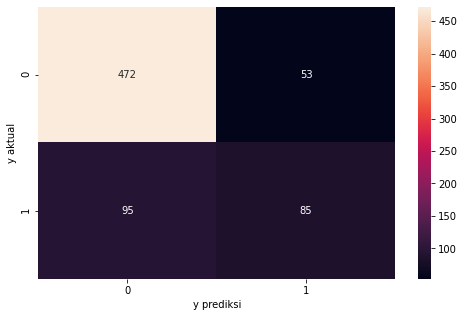

In [123]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yascal_test,y_predselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [124]:
print(classification_report(yascal_test,y_predselscal))

precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       525
         1.0       0.62      0.47      0.53       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.78      0.79      0.78       705



In [125]:
pd.DataFrame(data = [accuracy_score(yascal_test, y_predselscal)*100, recall_score(yascal_test, y_predselscal)*100,
                    precision_score(yascal_test, y_predselscal)*100, roc_auc_score(yascal_test, y_predselscal)*100,
                    f1_score(yascal_test, y_predselscal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.007092
recall,47.222222
precision,61.594203
roc_auc_score,68.563492
f1_score,53.459119


## Feature Selection Without Parameter Tuning Random Search with Scalling Train 80

In [126]:
# 10 Folds Cross Validation 
clf_scoreselscal80 = cross_val_score(modelselbscal, xb_train, yb_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [127]:
y_predselscalb = modelselbscal.predict(xbscal_test)

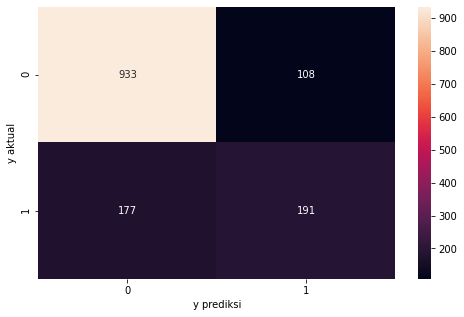

In [128]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ybscal_test,y_predselscalb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [129]:
print(classification_report(ybscal_test,y_predselscalb))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1041
         1.0       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [130]:
pd.DataFrame(data = [accuracy_score(ybscal_test, y_predselscalb)*100, recall_score(ybscal_test, y_predselscalb)*100,
                    precision_score(ybscal_test, y_predselscalb)*100, roc_auc_score(ybscal_test, y_predselscalb)*100,
                    f1_score(ybscal_test, y_predselscalb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.772889
recall,51.902174
precision,63.879599
roc_auc_score,70.763767
f1_score,57.271364


## Feature Selection With Parameter Tuning Random Search with Scalling Train 90

In [131]:
# modelselscaltun = LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100)
# modelselbscaltun = LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100)
modelselscaltun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)
modelselbscaltun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)
modelselscaltun.fit(xascal_train,yascal_train)
modelselbscaltun.fit(xbscal_train,ybscal_train)

LogisticRegression(penalty='none')

In [132]:
# 10 Folds Cross Validation 
clf_scoreselscaltun90 = cross_val_score(modelselscaltun, xascal_train, yascal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [133]:
y_predselscaltun = modelselscaltun.predict(xascal_test)

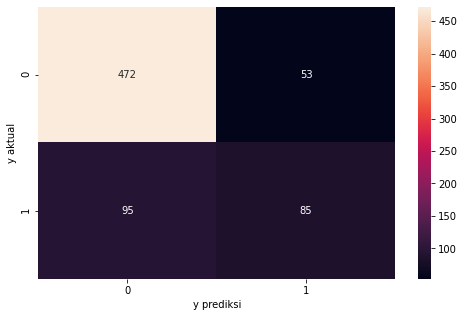

In [134]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yascal_test,y_predselscaltun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [135]:
print(classification_report(yascal_test,y_predselscaltun))

precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       525
         1.0       0.62      0.47      0.53       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.78      0.79      0.78       705



In [136]:
pd.DataFrame(data = [accuracy_score(yascal_test, y_predselscaltun)*100, recall_score(yascal_test, y_predselscaltun)*100,
                    precision_score(yascal_test, y_predselscaltun)*100, roc_auc_score(yascal_test, y_predselscaltun)*100,
                    f1_score(yascal_test, y_predselscaltun)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.007092
recall,47.222222
precision,61.594203
roc_auc_score,68.563492
f1_score,53.459119


## Feature Selection With Parameter Tuning Random Search with Scalling Train 80

In [137]:
# 10 Folds Cross Validation 
clf_scoreselscaltun80 = cross_val_score(modelselbscaltun, xbscal_train, ybscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [138]:
y_predselscaltunb = modelselbscaltun.predict(xbscal_test)

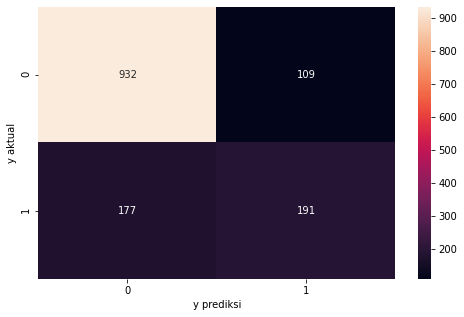

In [139]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ybscal_test,y_predselscaltunb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [140]:
print(classification_report(ybscal_test,y_predselscaltunb))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1041
         1.0       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [141]:
pd.DataFrame(data = [accuracy_score(ybscal_test, y_predselscaltunb)*100, recall_score(ybscal_test, y_predselscaltunb)*100,
                    precision_score(ybscal_test, y_predselscaltunb)*100, roc_auc_score(ybscal_test, y_predselscaltunb)*100,
                    f1_score(ybscal_test, y_predselscaltunb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,79.701916
recall,51.902174
precision,63.666667
roc_auc_score,70.715736
f1_score,57.185629


## RINGKASAN DAN KESIMPULAN MODEL TEST LOGISTIC REGRESSION

In [142]:
Logreg_Summary = pd.DataFrame({"Logistic Regression": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90": [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
                                "All Feature with Parameter Tuning RS and without Scalling train 90":[accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
                                "All Feature with Parameter Tuning RS and without Scalling train 80":[accuracy_score(yLR1_test,y_predLRRStun80)*100,recall_score(yLR1_test,y_predLRRStun80)*100,precision_score(yLR1_test,y_predLRRStun80)*100,roc_auc_score(yLR1_test,y_predLRRStun80)*100,f1_score(yLR1_test,y_predLRRStun80)*100],
                                "All Feature with Parameter Tuning RS and Scalling train 90":[accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
                                "All Feature with Parameter Tuning RS and Scalling train 80":[accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100],
                                "Feature Selection Without Parameter Tuning without Scalling Train 90":[accuracy_score(ya_test, y_predsel)*100, recall_score(ya_test, y_predsel)*100,
                    precision_score(ya_test, y_predsel)*100, roc_auc_score(ya_test, y_predsel)*100,
                    f1_score(ya_test, y_predsel)*100],
                                "Feature Selection Without Parameter Tuning without Scalling Train 80":[accuracy_score(yb_test, y_predselb)*100, recall_score(yb_test, y_predselb)*100,
                    precision_score(yb_test, y_predselb)*100, roc_auc_score(yb_test, y_predselb)*100,
                    f1_score(yb_test, y_predselb)*100],
                                "Feature Selection Without Parameter Tuning with Scalling Train 90":[accuracy_score(yascal_test, y_predselscal)*100, recall_score(yascal_test, y_predselscal)*100,
                    precision_score(yascal_test, y_predselscal)*100, roc_auc_score(yascal_test, y_predselscal)*100,
                    f1_score(yascal_test, y_predselscal)*100],
                                "Feature Selection Without Parameter Tuning with Scalling Train 80":[accuracy_score(ybscal_test, y_predselscalb)*100, recall_score(ybscal_test, y_predselscalb)*100,
                    precision_score(ybscal_test, y_predselscalb)*100, roc_auc_score(ybscal_test, y_predselscalb)*100,
                    f1_score(ybscal_test, y_predselscalb)*100],
                                "Feature Selection With Parameter Tuning without Scalling Train 90":[accuracy_score(ya_test, y_predseltun)*100, recall_score(ya_test, y_predseltun)*100,
                    precision_score(ya_test, y_predseltun)*100, roc_auc_score(ya_test, y_predseltun)*100,
                    f1_score(ya_test, y_predsel)*100],
                                "Feature Selection With Parameter Tuning without Scalling Train 80":[accuracy_score(yb_test, y_predseltunb)*100, recall_score(yb_test, y_predseltunb)*100,
                    precision_score(yb_test, y_predseltunb)*100, roc_auc_score(yb_test, y_predseltunb)*100,
                    f1_score(yb_test, y_predselb)*100],

                                "Feature Selection With Parameter Tuning with Scalling Train 90":[accuracy_score(yascal_test, y_predselscaltun)*100, recall_score(yascal_test, y_predselscaltun)*100,
                    precision_score(yascal_test, y_predselscaltun)*100, roc_auc_score(yascal_test, y_predselscaltun)*100,
                    f1_score(yascal_test, y_predselscaltun)*100],
                                "Feature Selection With Parameter Tuning with Scalling Train 80":[accuracy_score(ybscal_test, y_predselscaltunb)*100, recall_score(ybscal_test, y_predselscaltunb)*100,
                    precision_score(ybscal_test, y_predselscaltunb)*100, roc_auc_score(ybscal_test, y_predselscaltunb)*100,
                    f1_score(ybscal_test, y_predselscaltunb)*100]    
})
a = Logreg_Summary.set_index("Logistic Regression").T
a




Logistic Regression,accuracy,recall,precision,roc_auc_score,f1_score
All Feature without Parameter Tuning and without Scalling train 90,79.716312,51.111111,62.585034,70.317460,56.269113
All Feature without Parameter Tuning and without Scalling train 80,79.701916,51.358696,63.851351,70.540059,56.927711
All Feature with Parameter Tuning RS and without Scalling train 90,79.716312,51.111111,62.585034,70.317460,56.269113
All Feature with Parameter Tuning RS and without Scalling train 80,79.772889,52.445652,63.696370,70.939445,57.526080
All Feature with Parameter Tuning RS and Scalling train 90,79.858156,50.555556,63.194444,70.230159,56.172840
All Feature with Parameter Tuning RS and Scalling train 80,79.843861,52.445652,63.907285,70.987475,57.611940
Feature Selection Without Parameter Tuning without Scalling Train 90,78.865248,44.444444,62.015504,67.555556,51.779935
Feature Selection Without Parameter Tuning without Scalling Train 80,79.559972,49.456522,64.084507,69.829125,55.828221
Feature Selection Without Parameter Tuning with Scalling Train 90,79.007092,47.222222,61.594203,68.563492,53.459119
Feature Selection Without Parameter Tuning with Scalling Train 80,79.772889,51.902174,63.879599,70.763767,57.271364


## The Best Test Logistic Regression in Condition: All Feature with Parameter Tuning RS and Scalling train 80 

In [143]:
Logreg_Summary = pd.DataFrame({"Logistic Regression": ["accuracy","recall","precision","roc_auc_score","f1_score"],"All Feature with Parameter Tuning RS and Scalling train 80":[accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100]})
Logreg_Summary.set_index("Logistic Regression").T


Logistic Regression,accuracy,recall,precision,roc_auc_score,f1_score
All Feature with Parameter Tuning RS and Scalling train 80,79.843861,52.445652,63.907285,70.987475,57.61194


- We prefer to reduce prediction errors Positive / Churn (1)

<hr>
<hr>

# Decission Tree

In [144]:
df_DT = df2.copy()

In [145]:
x_DT = df_DT.drop(["Churn"],axis=1)
y_DT = df_DT["Churn"]

### All Feature without Parameter Tuning and without Scalling train 90

In [146]:
xDT_train, xDT_test, yDT_train, yDT_test = train_test_split(x_DT, y_DT, test_size = 0.1, random_state = 0)

In [147]:
modelDT = DecisionTreeClassifier()

modelDT.fit(xDT_train,yDT_train)

DecisionTreeClassifier()

In [148]:
# 10 Folds Cross Validation 
clf_scoreDT90 = cross_val_score(modelDT, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [149]:
y_predDT = modelDT.predict(xDT_test)

In [150]:
# plt.figure(figsize=(20, 20))
# tree.plot_tree(modelDT.fit(xDT_train, yDT_train))
# # plt.show()

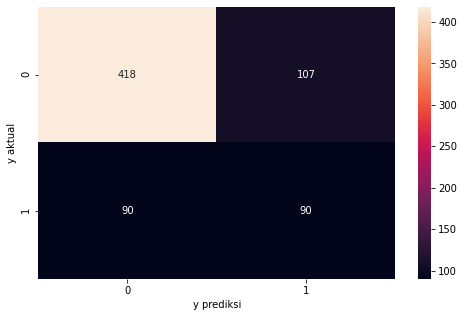

In [151]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [152]:
print(classification_report(yDT_test,y_predDT))

precision    recall  f1-score   support

           0       0.82      0.80      0.81       525
           1       0.46      0.50      0.48       180

    accuracy                           0.72       705
   macro avg       0.64      0.65      0.64       705
weighted avg       0.73      0.72      0.72       705



In [153]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,72.056738
recall,50.000000
precission,45.685279
roc_auc_score,64.809524
F1 Score,47.745358


### All Feature without Parameter Tuning and without Scalling train 80

In [154]:
xDT1_train, xDT1_test, yDT1_train, yDT1_test = train_test_split(x_DT, y_DT, test_size = 0.2, random_state = 0)

In [155]:
modelDT1 = DecisionTreeClassifier()

modelDT1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier()

In [156]:
# 10 Folds Cross Validation 
clf_scoreDT80 = cross_val_score(modelDT1, xDT1_train, yDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [157]:
y_predDT1 = modelDT1.predict(xDT1_test)

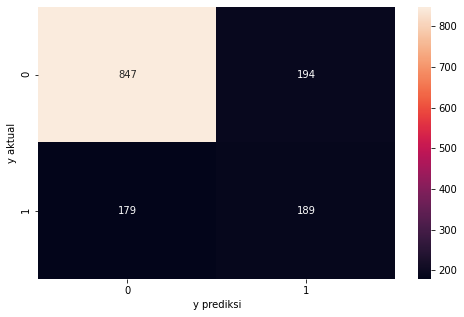

In [158]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [159]:
print(classification_report(yDT1_test,y_predDT1))

precision    recall  f1-score   support

           0       0.83      0.81      0.82      1041
           1       0.49      0.51      0.50       368

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



In [160]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDT1)*100,recall_score(yDT1_test,y_predDT1)*100,precision_score(yDT1_test,y_predDT1)*100,roc_auc_score(yDT1_test,y_predDT1)*100,f1_score(yDT1_test,y_predDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,73.527324
recall,51.358696
precission,49.347258
roc_auc_score,66.361384
F1 Score,50.332889


### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [161]:
modelDTRS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=2,max_depth=5,criterion="gini")
modelDTRS.fit(xDT_train,yDT_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [162]:
# 10 Folds Cross Validation 
clf_scoreDTRS90 = cross_val_score(modelDTRS, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [163]:
y_predDTRS = modelDTRS.predict(xDT_test)

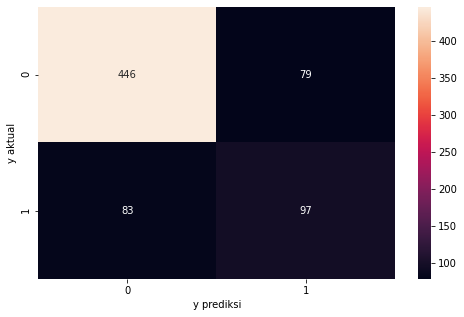

In [164]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [165]:
print(classification_report(yDT_test,y_predDTRS))

precision    recall  f1-score   support

           0       0.84      0.85      0.85       525
           1       0.55      0.54      0.54       180

    accuracy                           0.77       705
   macro avg       0.70      0.69      0.70       705
weighted avg       0.77      0.77      0.77       705



In [166]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDTRS)*100,recall_score(yDT_test,y_predDTRS)*100,precision_score(yDT_test,y_predDTRS)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT_test,y_predDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.021277
recall,53.888889
precission,55.113636
roc_auc_score,69.420635
F1 Score,54.494382


### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [167]:
modelDTRS1 = DecisionTreeClassifier(min_samples_split=4,min_samples_leaf=5,max_depth=4,criterion="entropy")
modelDTRS1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=4)

In [168]:
# 10 Folds Cross Validation 
clf_scoreDTRS80 = cross_val_score(modelDTRS1, xDT1_train, yDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [169]:
y_predDTRS1 = modelDTRS1.predict(xDT1_test)

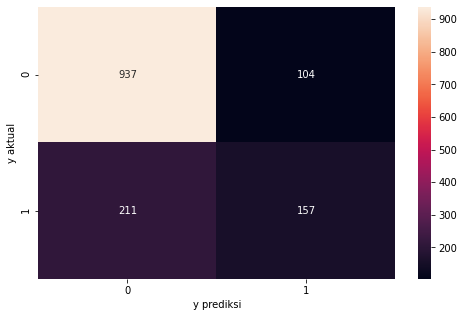

In [170]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [171]:
print(classification_report(yDT1_test,y_predDTRS1))

precision    recall  f1-score   support

           0       0.82      0.90      0.86      1041
           1       0.60      0.43      0.50       368

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [172]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDTRS1)*100,recall_score(yDT1_test,y_predDTRS1)*100,precision_score(yDT1_test,y_predDTRS1)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT1_test,y_predDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.643719
recall,42.663043
precission,60.153257
roc_auc_score,69.420635
F1 Score,49.920509


### All Feature with Parameter Tuning Grid Search and without Scalling train 90

In [173]:
modelDTGS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelDTGS.fit(xDT_train,yDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [174]:
# 10 Folds Cross Validation 
clf_scoreDTGS80 = cross_val_score(modelDTGS, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [175]:
y_predDTGS = modelDTGS.predict(xDT_test)

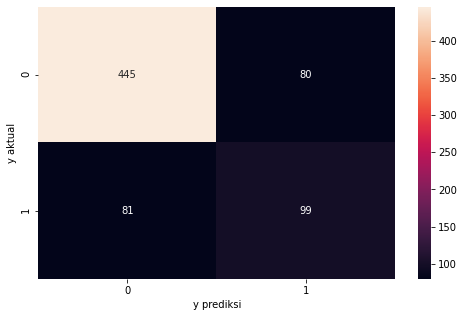

In [176]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [177]:
print(classification_report(yDT_test,y_predDTGS))

precision    recall  f1-score   support

           0       0.85      0.85      0.85       525
           1       0.55      0.55      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [178]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDTGS)*100,recall_score(yDT_test,y_predDTGS)*100,precision_score(yDT_test,y_predDTGS)*100,roc_auc_score(yDT_test,y_predDTGS)*100,f1_score(yDT_test,y_predDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,55.000000
precission,55.307263
roc_auc_score,69.880952
F1 Score,55.153203


### All Feature with Parameter Tuning Grid Search and without Scalling train 80

In [179]:
modelDTGS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=4,criterion="entropy")
modelDTGS1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [180]:
y_predDTGS1 = modelDTGS1.predict(xDT1_test)

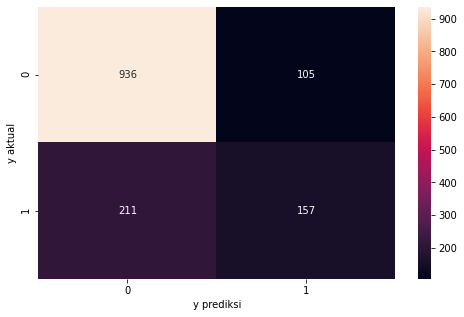

In [181]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [182]:
print(classification_report(yDT1_test,y_predDTGS1))

precision    recall  f1-score   support

           0       0.82      0.90      0.86      1041
           1       0.60      0.43      0.50       368

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [183]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDTGS1)*100,recall_score(yDT1_test,y_predDTGS1)*100,precision_score(yDT1_test,y_predDTGS1)*100,roc_auc_score(yDT1_test,y_predDTGS1)*100,f1_score(yDT1_test,y_predDTGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.572747
recall,42.663043
precission,59.923664
roc_auc_score,66.288294
F1 Score,49.841270


### All Feature without Parameter Tuning and with Scalling train 90

In [184]:
x_ScalDT = df2_Scal.drop(["Churn"],axis=1)
y_ScalDT = df2_Scal["Churn"]

In [185]:
xScalDT_train, xScalDT_test, yScalDT_train, yScalDT_test = train_test_split(x_ScalDT, y_ScalDT, test_size = 0.1, random_state = 0)


In [186]:
xScalDT1_train, xScalDT1_test, yScalDT1_train, yScalDT1_test = train_test_split(x_ScalDT, y_ScalDT, test_size = 0.2, random_state = 0)

In [187]:
modelDTScal = DecisionTreeClassifier()
modelDTScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier()

In [188]:
# 10 Folds Cross Validation 
clf_scoreDTScal = cross_val_score(modelDTScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [189]:
y_predScalDT = modelDTScal.predict(xScalDT_test)

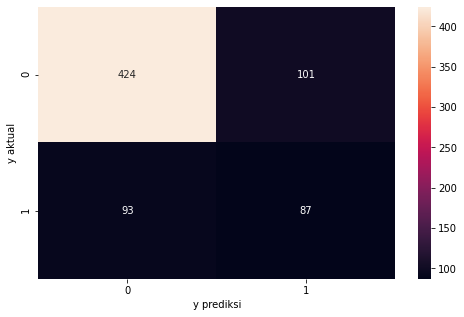

In [190]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [191]:
print(classification_report(yDT_test,y_predScalDT))

precision    recall  f1-score   support

           0       0.82      0.81      0.81       525
           1       0.46      0.48      0.47       180

    accuracy                           0.72       705
   macro avg       0.64      0.65      0.64       705
weighted avg       0.73      0.72      0.73       705



In [192]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDT)*100,recall_score(yScalDT_test,y_predScalDT)*100,precision_score(yScalDT_test,y_predScalDT)*100,roc_auc_score(yScalDT_test,y_predScalDT)*100,f1_score(yScalDT_test,y_predScalDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,72.482270
recall,48.333333
precission,46.276596
roc_auc_score,64.547619
F1 Score,47.282609


### All Feature without Parameter Tuning and with Scalling train 80

In [193]:
modelDTScal1 = DecisionTreeClassifier()
modelDTScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier()

In [194]:
# 10 Folds Cross Validation 
clf_scoreDTScal1 = cross_val_score(modelDTScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [195]:
y_predScalDT1 = modelDTScal1.predict(xScalDT1_test)

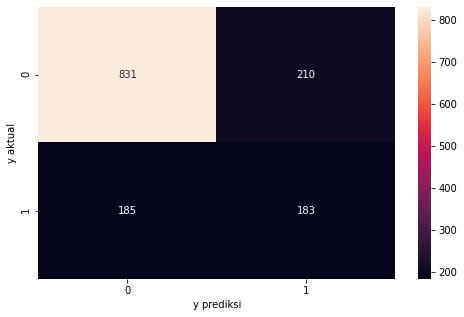

In [196]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [197]:
print(classification_report(yDT1_test,y_predScalDT1))

precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.47      0.50      0.48       368

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.73      0.72      0.72      1409



In [198]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDT1)*100,recall_score(yScalDT1_test,y_predScalDT1)*100,precision_score(yScalDT1_test,y_predScalDT1)*100,roc_auc_score(yScalDT1_test,y_predScalDT1)*100,f1_score(yScalDT1_test,y_predScalDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,71.965933
recall,49.728261
precission,46.564885
roc_auc_score,64.777675
F1 Score,48.094612


### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [199]:
modelDTRSScal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=2,max_depth=5,criterion="entropy")
modelDTRSScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3)

In [200]:
# 10 Folds Cross Validation 
clf_scoreDTRSScal = cross_val_score(modelDTRSScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [201]:
y_predScalDTRS = modelDTRSScal.predict(xScalDT_test)

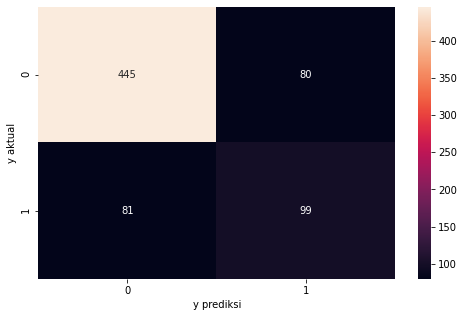

In [202]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [203]:
print(classification_report(yDT_test,y_predScalDTRS))

precision    recall  f1-score   support

           0       0.85      0.85      0.85       525
           1       0.55      0.55      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [204]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDTRS)*100,recall_score(yScalDT_test,y_predScalDTRS)*100,precision_score(yScalDT_test,y_predScalDTRS)*100,roc_auc_score(yScalDT_test,y_predScalDTRS)*100,f1_score(yScalDT_test,y_predScalDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,55.000000
precission,55.307263
roc_auc_score,69.880952
F1 Score,55.153203


### All Feature with Parameter Tuning Random Search and with Scalling train 80

In [205]:
modelDTRSScal1 = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=2,max_depth=5,criterion="entropy")
modelDTRSScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

In [206]:
# 10 Folds Cross Validation 
clf_scoreDTRSScal1 = cross_val_score(modelDTRSScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [207]:
y_predScalDTRS1 = modelDTRSScal1.predict(xScalDT1_test)

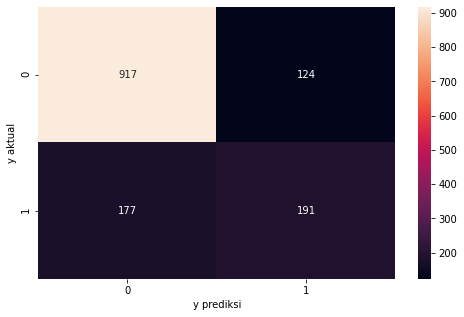

In [208]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [209]:
print(classification_report(yDT1_test,y_predScalDTRS1))

precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.61      0.52      0.56       368

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [210]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDTRS1)*100,recall_score(yScalDT1_test,y_predScalDTRS1)*100,precision_score(yScalDT1_test,y_predScalDTRS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTRS1)*100,f1_score(yScalDT1_test,y_predScalDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.637331
recall,51.902174
precission,60.634921
roc_auc_score,69.995275
F1 Score,55.929722


### All Feature with Parameter Tuning Grid Search and with Scalling train 90

In [211]:
modelDTGSScal = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelDTGSScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [212]:
# 10 Folds Cross Validation 
clf_scoreDTGSScal = cross_val_score(modelDTGSScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [213]:
y_predScalDTGS = modelDTGSScal.predict(xScalDT_test)

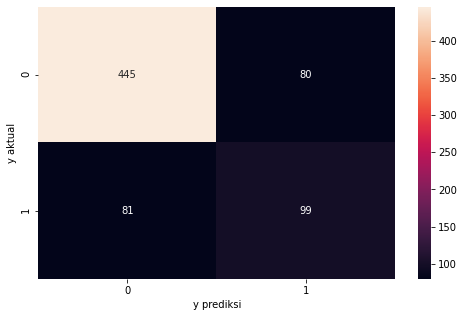

In [214]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [215]:
print(classification_report(yDT_test,y_predScalDTGS))

precision    recall  f1-score   support

           0       0.85      0.85      0.85       525
           1       0.55      0.55      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [216]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDTGS)*100,recall_score(yScalDT_test,y_predScalDTGS)*100,precision_score(yScalDT_test,y_predScalDTGS)*100,roc_auc_score(yScalDT_test,y_predScalDTGS)*100,f1_score(yScalDT_test,y_predScalDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,55.000000
precission,55.307263
roc_auc_score,69.880952
F1 Score,55.153203


### All Feature with Parameter Tuning Grid Search and with Scalling train 80

In [217]:
modelDTGSScal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=4,criterion="entropy")
modelDTGSScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [218]:
# 10 Folds Cross Validation 
clf_scoreDTGSScal1 = cross_val_score(modelDTGSScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [219]:
y_predScalDTGS1 = modelDTGSScal1.predict(xScalDT1_test)

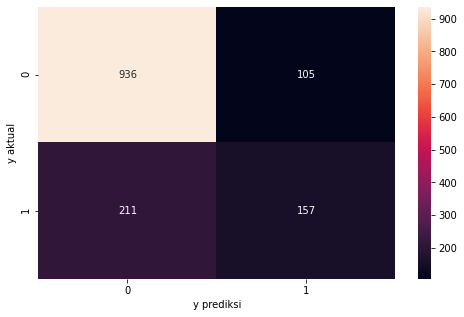

In [220]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [221]:
print(classification_report(yDT1_test,y_predScalDTGS1))

precision    recall  f1-score   support

           0       0.82      0.90      0.86      1041
           1       0.60      0.43      0.50       368

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [222]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDTGS1)*100,recall_score(yScalDT1_test,y_predScalDTGS1)*100,precision_score(yScalDT1_test,y_predScalDTGS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTGS1)*100,f1_score(yScalDT1_test,y_predScalDTGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.572747
recall,42.663043
precission,59.923664
roc_auc_score,66.288294
F1 Score,49.841270


## Decision Tree With Feature Selection

In [223]:
x_selDT = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selDT  = df2["Churn"]

In [224]:
xselDT_train, xselDT_test, yselDT_train, yselDT_test = train_test_split(x_selDT, y_selDT, test_size = 0.1, random_state = 0)


In [225]:
xselDT1_train, xselDT1_test, yselDT1_train, yselDT1_test = train_test_split(x_selDT, y_selDT, test_size = 0.1, random_state = 0)


### Feature Selection without Parameter Tuning Search and without Scalling train 90

In [226]:
modelselDT = DecisionTreeClassifier()
modelselDT.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier()

In [227]:
# 10 Folds Cross Validation 
clf_scoreDTsel = cross_val_score(modelselDT, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [228]:
y_predselDT = modelselDT.predict(xselDT_test)

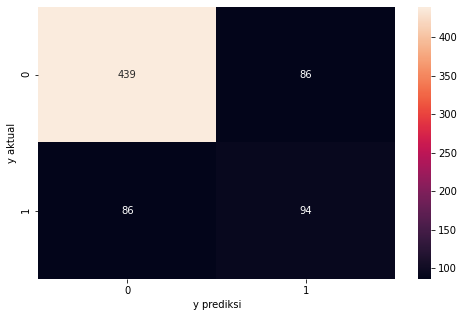

In [229]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [230]:
print(classification_report(yselDT_test,y_predselDT))

precision    recall  f1-score   support

           0       0.84      0.84      0.84       525
           1       0.52      0.52      0.52       180

    accuracy                           0.76       705
   macro avg       0.68      0.68      0.68       705
weighted avg       0.76      0.76      0.76       705



In [231]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDT)*100,recall_score(yselDT_test,y_predselDT)*100,precision_score(yselDT_test,y_predselDT)*100,roc_auc_score(yselDT_test,y_predselDT)*100,f1_score(yselDT_test,y_predselDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,75.602837
recall,52.222222
precission,52.222222
roc_auc_score,67.920635
F1 Score,52.222222


### Feature Selection without Parameter Tuning and without Scalling train 80

In [232]:
modelselDT1 = DecisionTreeClassifier()
modelselDT1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier()

In [233]:
# 10 Folds Cross Validation 
clf_scoreDTsel80 = cross_val_score(modelselDT1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [234]:
y_predselDT1 = modelselDT1.predict(xselDT1_test)

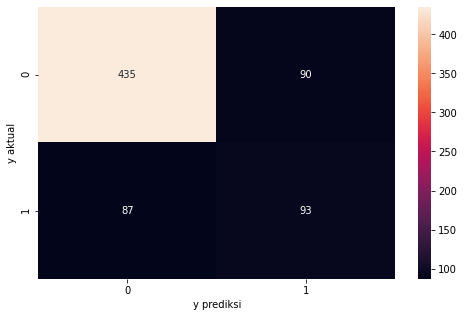

In [235]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [236]:
print(classification_report(yselDT1_test,y_predselDT1))

precision    recall  f1-score   support

           0       0.83      0.83      0.83       525
           1       0.51      0.52      0.51       180

    accuracy                           0.75       705
   macro avg       0.67      0.67      0.67       705
weighted avg       0.75      0.75      0.75       705



In [237]:
pd.DataFrame(data= [accuracy_score(yselDT1_test,y_predselDT1)*100,recall_score(yselDT1_test,y_predselDT1)*100,precision_score(yselDT1_test,y_predselDT1)*100,roc_auc_score(yselDT1_test,y_predselDT1)*100,f1_score(yselDT1_test,y_predselDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,74.893617
recall,51.666667
precission,50.819672
roc_auc_score,67.261905
F1 Score,51.239669


### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [238]:
modelselDTRS = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTRS.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5)

In [239]:
# 10 Folds Cross Validation 
clf_scoreDTRSsel = cross_val_score(modelselDTRS, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [240]:
y_predselDTRS = modelselDTRS.predict(xselDT_test)

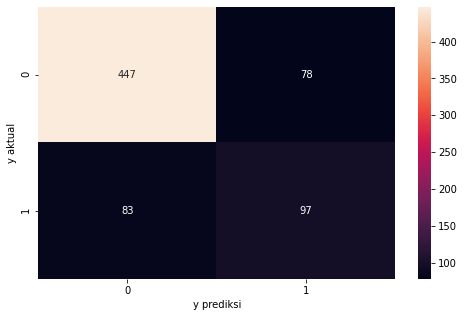

In [241]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [242]:
print(classification_report(yselDT_test,y_predselDTRS))

precision    recall  f1-score   support

           0       0.84      0.85      0.85       525
           1       0.55      0.54      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [243]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTRS)*100,recall_score(yselDT_test,y_predselDTRS)*100,precision_score(yselDT_test,y_predselDTRS)*100,roc_auc_score(yselDT_test,y_predselDTRS)*100,f1_score(yselDT_test,y_predselDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,53.888889
precission,55.428571
roc_auc_score,69.515873
F1 Score,54.647887


### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [244]:
modelselDTRS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=4,max_depth=4,criterion="entropy")
modelselDTRS1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [245]:
# 10 Folds Cross Validation 
clf_scoreDTRSsel80 = cross_val_score(modelselDTRS1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [246]:
y_predselDTRS1 = modelselDTRS1.predict(xselDT1_test)

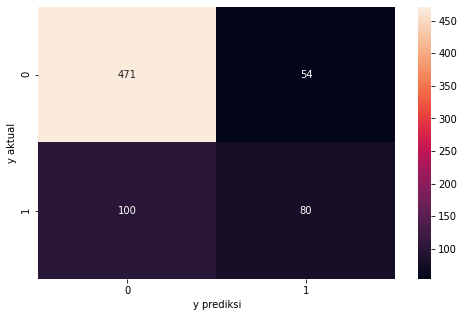

In [247]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [248]:
print(classification_report(yselDT1_test,y_predselDTRS1))

precision    recall  f1-score   support

           0       0.82      0.90      0.86       525
           1       0.60      0.44      0.51       180

    accuracy                           0.78       705
   macro avg       0.71      0.67      0.68       705
weighted avg       0.77      0.78      0.77       705



In [249]:
pd.DataFrame(data= [accuracy_score(yselDT1_test,y_predselDTRS1)*100,recall_score(yselDT1_test,y_predselDTRS1)*100,precision_score(yselDT1_test,y_predselDTRS1)*100,roc_auc_score(yselDT1_test,y_predselDTRS1)*100,f1_score(yselDT1_test,y_predselDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.156028
recall,44.444444
precission,59.701493
roc_auc_score,67.079365
F1 Score,50.955414


### Feature Selection without Parameter Tuning but with Scalling train 90

In [250]:
modelselDTGS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTGS.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [251]:
# 10 Folds Cross Validation 
clf_scoreDTGSsel = cross_val_score(modelselDTGS, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [252]:
y_predselDTGS = modelselDTGS.predict(xselDT_test)

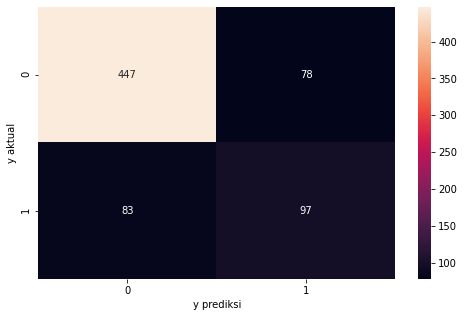

In [253]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [254]:
print(classification_report(yselDT_test,y_predselDTGS))

precision    recall  f1-score   support

           0       0.84      0.85      0.85       525
           1       0.55      0.54      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [255]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTGS)*100,recall_score(yselDT_test,y_predselDTGS)*100,precision_score(yselDT_test,y_predselDTGS)*100,roc_auc_score(yselDT_test,y_predselDTGS)*100,f1_score(yselDT_test,y_predselDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,53.888889
precission,55.428571
roc_auc_score,69.515873
F1 Score,54.647887


In [256]:
modelselDTGS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=5,max_depth=5,criterion="entropy")
modelselDTGS1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [257]:
# 10 Folds Cross Validation 
clf_scoreDTGSsel80 = cross_val_score(modelselDTGS1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [258]:
y_predselDTGS1 = modelselDTGS1.predict(xselDT1_test)

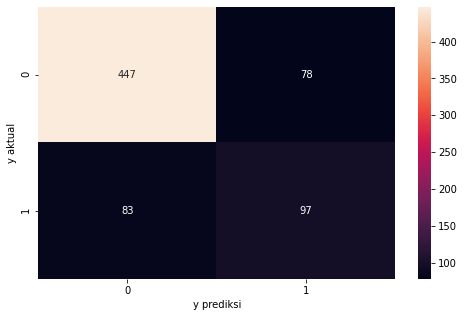

In [259]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [260]:
print(classification_report(yselDT1_test,y_predselDTGS1))

precision    recall  f1-score   support

           0       0.84      0.85      0.85       525
           1       0.55      0.54      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [261]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTGS)*100,recall_score(yselDT_test,y_predselDTGS)*100,precision_score(yselDT_test,y_predselDTGS)*100,roc_auc_score(yselDT_test,y_predselDTGS)*100,f1_score(yselDT_test,y_predselDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,53.888889
precission,55.428571
roc_auc_score,69.515873
F1 Score,54.647887


In [262]:
x_selDTScal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selDTScal  = df2_Scal["Churn"]

In [263]:
xselDTscal_train, xselDTscal_test, yselDTscal_train, yselDTscal_test = train_test_split(x_selDTScal, y_selDTScal, test_size = 0.1, random_state = 0)

In [264]:
xselDTscal1_train, xselDTscal1_test, yselDTscal1_train, yselDTscal1_test = train_test_split(x_selDTScal, y_selDTScal, test_size = 0.2, random_state = 0)

In [265]:
modelselDTscal = DecisionTreeClassifier()
modelselDTscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier()

In [266]:
# 10 Folds Cross Validation 
clf_scoreDTselscal = cross_val_score(modelselDTscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [267]:
y_predselDTscal = modelselDTscal.predict(xselDTscal_test)

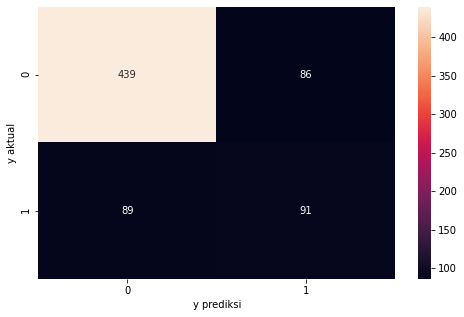

In [268]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [269]:
print(classification_report(yselDTscal_test,y_predselDTscal))

precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       525
         1.0       0.51      0.51      0.51       180

    accuracy                           0.75       705
   macro avg       0.67      0.67      0.67       705
weighted avg       0.75      0.75      0.75       705



In [270]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTscal)*100,recall_score(yselDTscal_test,y_predselDTscal)*100,precision_score(yselDTscal_test,y_predselDTscal)*100,roc_auc_score(yselDTscal_test,y_predselDTscal)*100,f1_score(yselDTscal_test,y_predselDTscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,75.177305
recall,50.555556
precission,51.412429
roc_auc_score,67.087302
F1 Score,50.980392


### Feature Selection without Parameter Tuning but with Scalling train 80

In [271]:
modelselDTscal1 = DecisionTreeClassifier()
modelselDTscal1.fit(xselDTscal1_train,yselDTscal1_train)

DecisionTreeClassifier()

In [272]:
# 10 Folds Cross Validation 
clf_scoreDTselscal80 = cross_val_score(modelselDTscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [273]:
y_predselDTscal1 = modelselDTscal1.predict(xselDTscal1_test)

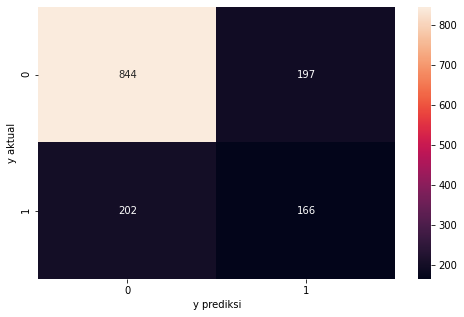

In [274]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [275]:
print(classification_report(yselDTscal1_test,y_predselDTscal1))

precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1041
         1.0       0.46      0.45      0.45       368

    accuracy                           0.72      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.72      0.72      0.72      1409



In [276]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTscal1)*100,recall_score(yselDTscal1_test,y_predselDTscal1)*100,precision_score(yselDTscal1_test,y_predselDTscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTscal1)*100,f1_score(yselDTscal1_test,y_predselDTscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,71.682044
recall,45.108696
precission,45.730028
roc_auc_score,63.092292
F1 Score,45.417237


### Feature Selection with Parameter Tuning Random Search but with Scalling train 90

In [277]:
modelselDTRSscal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=4,max_depth=5,criterion="entropy")
modelselDTRSscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=3)

In [278]:
# 10 Folds Cross Validation 
clf_scoreDTRSselscal = cross_val_score(modelselDTRSscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [279]:
y_predselDTRSscal = modelselDTRSscal.predict(xselDTscal_test)

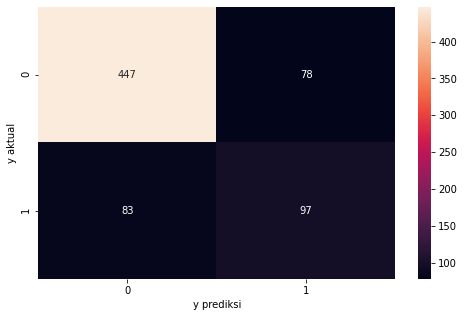

In [280]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [281]:
print(classification_report(yselDTscal_test,y_predselDTRSscal))

precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       525
         1.0       0.55      0.54      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [282]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTRSscal)*100,recall_score(yselDTscal_test,y_predselDTRSscal)*100,precision_score(yselDTscal_test,y_predselDTRSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTRSscal)*100,f1_score(yselDTscal_test,y_predselDTRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,53.888889
precission,55.428571
roc_auc_score,69.515873
F1 Score,54.647887


### Feature Selection with Parameter Tuning Random Search but with Scalling train 80

In [283]:
modelselDTRSscal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=5,criterion="entropy")
modelselDTRSscal1.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [284]:
# 10 Folds Cross Validation 
clf_scoreDTRSselscal1 = cross_val_score(modelselDTRSscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [285]:
y_predselDTRSscal1 = modelselDTRSscal1.predict(xselDTscal1_test)

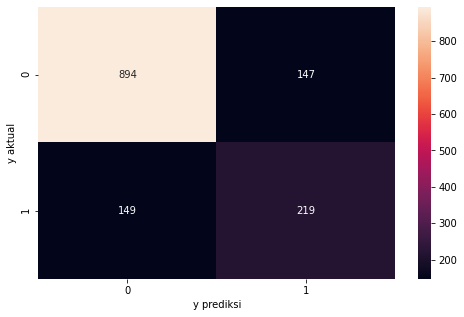

In [286]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [287]:
print(classification_report(yselDTscal1_test,y_predselDTRSscal1))

precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1041
         1.0       0.60      0.60      0.60       368

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [288]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.992193
recall,59.510870
precission,59.836066
roc_auc_score,72.694916
F1 Score,59.673025


### Feature Selection with Parameter Tuning Grid Search but with Scalling train 90

In [289]:
modelselDTGSscal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTGSscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3)

In [290]:
# 10 Folds Cross Validation 
clf_scoreDTGSselscal = cross_val_score(modelselDTGSscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [291]:
y_predselDTGSscal = modelselDTGSscal.predict(xselDTscal_test)

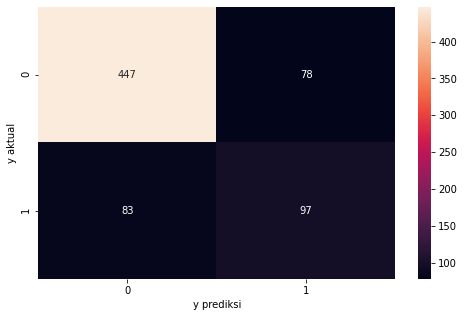

In [292]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTGSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [293]:
print(classification_report(yselDTscal_test,y_predselDTGSscal))

precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       525
         1.0       0.55      0.54      0.55       180

    accuracy                           0.77       705
   macro avg       0.70      0.70      0.70       705
weighted avg       0.77      0.77      0.77       705



In [294]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTGSscal)*100,recall_score(yselDTscal_test,y_predselDTGSscal)*100,precision_score(yselDTscal_test,y_predselDTGSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTGSscal)*100,f1_score(yselDTscal_test,y_predselDTGSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.163121
recall,53.888889
precission,55.428571
roc_auc_score,69.515873
F1 Score,54.647887


### Feature Selection with Parameter Tuning Grid Search but with Scalling train 80

In [295]:
modelselDTGSscal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=5,max_depth=5,criterion="entropy")
modelselDTGSscal1.fit(xselDTscal1_train,yselDTscal1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [296]:
# 10 Folds Cross Validation 
clf_scoreDTGSselscal80 = cross_val_score(modelselDTGSscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [297]:
y_predselDTGSscal1 = modelselDTGSscal1.predict(xselDTscal1_test)

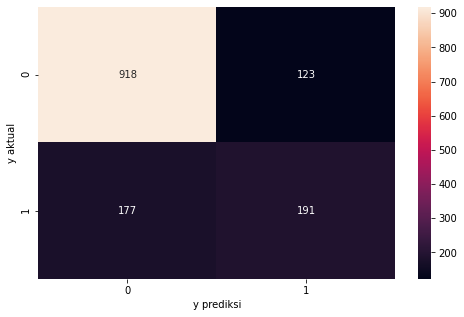

In [298]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTGSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [299]:
print(classification_report(yselDTscal1_test,y_predselDTGSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1041
         1.0       0.61      0.52      0.56       368

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [300]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTGSscal1)*100,recall_score(yselDTscal1_test,y_predselDTGSscal1)*100,precision_score(yselDTscal1_test,y_predselDTGSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTGSscal1)*100,f1_score(yselDTscal1_test,y_predselDTGSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.708304
recall,51.902174
precission,60.828025
roc_auc_score,70.043306
F1 Score,56.011730


In [301]:
Logreg_Summary = pd.DataFrame({"Decision Tree": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yDT1_test,y_predDT1)*100,recall_score(yDT1_test,y_predDT1)*100,precision_score(yDT1_test,y_predDT1)*100,roc_auc_score(yDT1_test,y_predDT1)*100,f1_score(yDT1_test,y_predDT1)*100],
                                "All Feature with Parameter Tuning Random and without Scalling train 90":[accuracy_score(yDT_test,y_predDTRS)*100,recall_score(yDT_test,y_predDTRS)*100,precision_score(yDT_test,y_predDTRS)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT_test,y_predDTRS)*100],
                                "All Feature with Parameter Tuning Random and without Scalling train 80":[accuracy_score(yDT1_test,y_predDTRS1)*100,recall_score(yDT1_test,y_predDTRS1)*100,precision_score(yDT1_test,y_predDTRS1)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT1_test,y_predDTRS1)*100],
                                "All Feature with Parameter Tuning Grid and without Scalling train 90":[accuracy_score(yDT_test,y_predDTGS)*100,recall_score(yDT_test,y_predDTGS)*100,precision_score(yDT_test,y_predDTGS)*100,roc_auc_score(yDT_test,y_predDTGS)*100,f1_score(yDT_test,y_predDTGS)*100],
                                "All Feature with Parameter Tuning Grid and without Scalling train 80":[accuracy_score(yDT1_test,y_predDTGS1)*100,recall_score(yDT1_test,y_predDTGS1)*100,precision_score(yDT1_test,y_predDTGS1)*100,roc_auc_score(yDT1_test,y_predDTGS1)*100,f1_score(yDT1_test,y_predDTGS1)*100],
                               "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDT)*100,recall_score(yScalDT_test,y_predScalDT)*100,precision_score(yScalDT_test,y_predScalDT)*100,roc_auc_score(yScalDT_test,y_predScalDT)*100,f1_score(yScalDT_test,y_predScalDT)*100],
                                "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDT1)*100,recall_score(yScalDT1_test,y_predScalDT1)*100,precision_score(yScalDT1_test,y_predScalDT1)*100,roc_auc_score(yScalDT1_test,y_predScalDT1)*100,f1_score(yScalDT1_test,y_predScalDT1)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDTRS)*100,recall_score(yScalDT_test,y_predScalDTRS)*100,precision_score(yScalDT_test,y_predScalDTRS)*100,roc_auc_score(yScalDT_test,y_predScalDTRS)*100,f1_score(yScalDT_test,y_predScalDTRS)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDTRS1)*100,recall_score(yScalDT1_test,y_predScalDTRS1)*100,precision_score(yScalDT1_test,y_predScalDTRS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTRS1)*100,f1_score(yScalDT1_test,y_predScalDTRS1)*100],
                                "All Feature with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDTGS)*100,recall_score(yScalDT_test,y_predScalDTGS)*100,precision_score(yScalDT_test,y_predScalDTGS)*100,roc_auc_score(yScalDT_test,y_predScalDTGS)*100,f1_score(yScalDT_test,y_predScalDTGS)*100],
                                "All Feature with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDTGS1)*100,recall_score(yScalDT1_test,y_predScalDTGS1)*100,precision_score(yScalDT1_test,y_predScalDTGS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTGS1)*100,f1_score(yScalDT1_test,y_predScalDTGS1)*100],
                                "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselDT_test,y_predselDT)*100,recall_score(yselDT_test,y_predselDT)*100,precision_score(yselDT_test,y_predselDT)*100,roc_auc_score(yselDT_test,y_predselDT)*100,f1_score(yselDT_test,y_predselDT)*100],
                                "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselDT1_test,y_predselDT1)*100,recall_score(yselDT1_test,y_predselDT1)*100,precision_score(yselDT1_test,y_predselDT1)*100,roc_auc_score(yselDT1_test,y_predselDT1)*100,f1_score(yselDT1_test,y_predselDT1)*100],
                                "Feature Selection with Parameter Tuning and without Scalling train 90":[accuracy_score(yselDT_test,y_predselDTRS)*100,recall_score(yselDT_test,y_predselDTRS)*100,precision_score(yselDT_test,y_predselDTRS)*100,roc_auc_score(yselDT_test,y_predselDTRS)*100,f1_score(yselDT_test,y_predselDTRS)*100],
                                "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselDT1_test,y_predselDTRS1)*100,recall_score(yselDT1_test,y_predselDTRS1)*100,precision_score(yselDT1_test,y_predselDTRS1)*100,roc_auc_score(yselDT1_test,y_predselDTRS1)*100,f1_score(yselDT1_test,y_predselDTRS1)*100],
                                "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTscal)*100,recall_score(yselDTscal_test,y_predselDTscal)*100,precision_score(yselDTscal_test,y_predselDTscal)*100,roc_auc_score(yselDTscal_test,y_predselDTscal)*100,f1_score(yselDTscal_test,y_predselDTscal)*100],
                                "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselDTscal1_test,y_predselDTscal1)*100,recall_score(yselDTscal1_test,y_predselDTscal1)*100,precision_score(yselDTscal1_test,y_predselDTscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTscal1)*100,f1_score(yselDTscal1_test,y_predselDTscal1)*100],
                                "Feature Selection with Parameter Tuning Random Seacrh and with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTRSscal)*100,recall_score(yselDTscal_test,y_predselDTRSscal)*100,precision_score(yselDTscal_test,y_predselDTRSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTRSscal)*100,f1_score(yselDTscal_test,y_predselDTRSscal)*100],
                                "Feature Selection with Parameter Tuning Random Search and with Scalling train 80": [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100],
                                "Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTGSscal)*100,recall_score(yselDTscal_test,y_predselDTGSscal)*100,precision_score(yselDTscal_test,y_predselDTGSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTGSscal)*100,f1_score(yselDTscal_test,y_predselDTGSscal)*100],
                                "Feature Selection with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yselDTscal1_test,y_predselDTGSscal1)*100,recall_score(yselDTscal1_test,y_predselDTGSscal1)*100,precision_score(yselDTscal1_test,y_predselDTGSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTGSscal1)*100,f1_score(yselDTscal1_test,y_predselDTGSscal1)*100]

})
b = Logreg_Summary.set_index("Decision Tree").T
b   

Decision Tree,accuracy,recall,precision,roc_auc_score,f1_score
All Feature without Parameter Tuning and without Scalling train 90,72.056738,50.000000,45.685279,64.809524,47.745358
All Feature without Parameter Tuning and without Scalling train 80,73.527324,51.358696,49.347258,66.361384,50.332889
All Feature with Parameter Tuning Random and without Scalling train 90,77.021277,53.888889,55.113636,69.420635,54.494382
All Feature with Parameter Tuning Random and without Scalling train 80,77.643719,42.663043,60.153257,69.420635,49.920509
All Feature with Parameter Tuning Grid and without Scalling train 90,77.163121,55.000000,55.307263,69.880952,55.153203
All Feature with Parameter Tuning Grid and without Scalling train 80,77.572747,42.663043,59.923664,66.288294,49.841270
All Feature without Parameter Tuning but with Scalling train 90,72.482270,48.333333,46.276596,64.547619,47.282609
All Feature without Parameter Tuning but with Scalling train 80,71.965933,49.728261,46.564885,64.777675,48.094612
All Feature with Parameter Tuning Random Search and with Scalling train 90,77.163121,55.000000,55.307263,69.880952,55.153203
All Feature with Parameter Tuning Random Search and with Scalling train 80,78.637331,51.902174,60.634921,69.995275,55.929722


# RANDOM FOREST

In [302]:
df_RF = df2.copy()

In [303]:
x_RF = df_RF.drop(["Churn"],axis=1)
y_RF = df_RF["Churn"]

In [304]:
xRF_train, xRF_test, yRF_train, yRF_test = train_test_split(x_RF, y_RF, test_size = 0.1, random_state = 0)

In [305]:
xRF1_train, xRF1_test, yRF1_train, yRF1_test = train_test_split(x_RF, y_RF, test_size = 0.2, random_state = 0)

### All Feature without Parameter Tuning and without Scalling train 90

In [306]:
modelRF = RandomForestClassifier()
modelRF.fit(xRF_train, yRF_train)

RandomForestClassifier()

In [307]:
# 10 Folds Cross Validation 
clf_scoreRF = cross_val_score(modelRF, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [308]:
y_predRF = modelRF.predict(xRF_test)

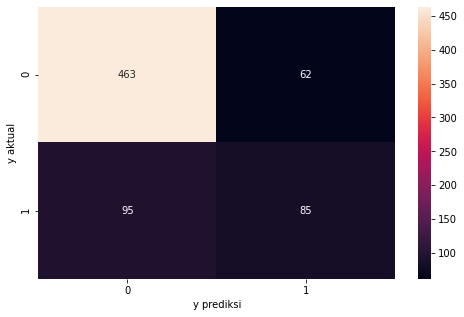

In [309]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRF),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [310]:
print(classification_report(yRF_test,y_predRF))

precision    recall  f1-score   support

           0       0.83      0.88      0.86       525
           1       0.58      0.47      0.52       180

    accuracy                           0.78       705
   macro avg       0.70      0.68      0.69       705
weighted avg       0.77      0.78      0.77       705



In [311]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.730496
recall,47.222222
precission,57.823129
roc_auc_score,67.706349
F1 Score,51.987768


### All Feature without Parameter Tuning and without Scalling train 80

In [312]:
modelRF1 = RandomForestClassifier()
modelRF1.fit(xRF1_train, yRF1_train)

RandomForestClassifier()

In [313]:
# 10 Folds Cross Validation 
clf_scoreRF1 = cross_val_score(modelRF1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [314]:
y_predRF1 = modelRF1.predict(xRF1_test)

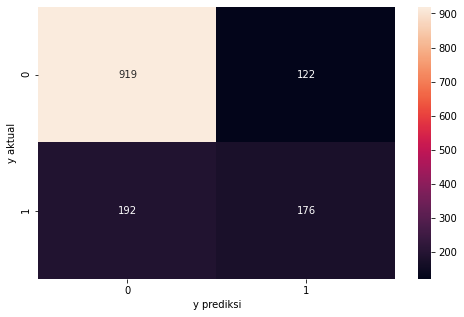

In [315]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRF1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [316]:
print(classification_report(yRF1_test,y_predRF1))

precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.59      0.48      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [317]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRF1)*100,recall_score(yRF1_test,y_predRF1)*100,precision_score(yRF1_test,y_predRF1)*100,roc_auc_score(yRF1_test,y_predRF1)*100,f1_score(yRF1_test,y_predRF1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.714691
recall,47.826087
precission,59.060403
roc_auc_score,68.053293
F1 Score,52.852853


### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [318]:
modelRFRS = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=4,n_estimators=400)
modelRFRS.fit(xRF_train, yRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [319]:
# 10 Folds Cross Validation 
clf_scoreRFRS = cross_val_score(modelRFRS, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [320]:
y_predRFRS = modelRFRS.predict(xRF_test)

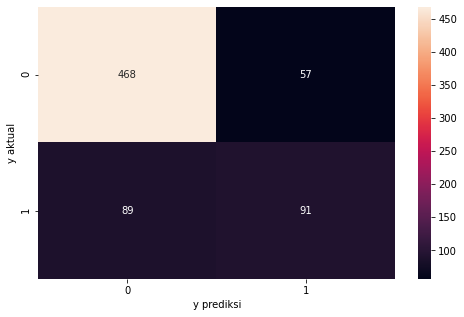

In [321]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRFRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [322]:
print(classification_report(yRF_test,y_predRFRS))

precision    recall  f1-score   support

           0       0.84      0.89      0.87       525
           1       0.61      0.51      0.55       180

    accuracy                           0.79       705
   macro avg       0.73      0.70      0.71       705
weighted avg       0.78      0.79      0.79       705



In [323]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRFRS)*100,recall_score(yRF_test,y_predRFRS)*100,precision_score(yRF_test,y_predRFRS)*100,roc_auc_score(yRF_test,y_predRFRS)*100,f1_score(yRF_test,y_predRFRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.290780
recall,50.555556
precission,61.486486
roc_auc_score,69.849206
F1 Score,55.487805


### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [324]:
modelRFRS1 = RandomForestClassifier(max_depth=90,min_samples_split=10,min_samples_leaf=2,n_estimators=1000)
modelRFRS1.fit(xRF1_train, yRF1_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [325]:
# 10 Folds Cross Validation 
clf_scoreRFRS1 = cross_val_score(modelRFRS1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [326]:
y_predRFRS1 = modelRFRS1.predict(xRF1_test)

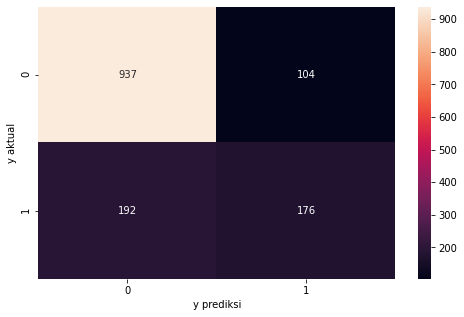

In [327]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRFRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [328]:
print(classification_report(yRF1_test,y_predRFRS1))

precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.48      0.54       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [329]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRFRS1)*100,recall_score(yRF1_test,y_predRFRS1)*100,precision_score(yRF1_test,y_predRFRS1)*100,roc_auc_score(yRF1_test,y_predRFRS1)*100,f1_score(yRF1_test,y_predRFRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.992193
recall,47.826087
precission,62.857143
roc_auc_score,68.917847
F1 Score,54.320988


### All Feature with Parameter Tuning Grid Search and without Scalling train 90

In [330]:
modelRFGS = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=2,n_estimators=200)
modelRFGS.fit(xRF_train, yRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [331]:
# 10 Folds Cross Validation 
clf_scoreRFGS = cross_val_score(modelRFGS, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [332]:
y_predRFGS = modelRFGS.predict(xRF_test)

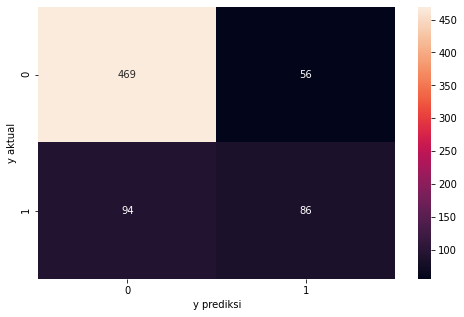

In [333]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRFGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [334]:
print(classification_report(yRF_test,y_predRFGS))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       525
           1       0.61      0.48      0.53       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.77      0.79      0.78       705



In [335]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRFGS)*100,recall_score(yRF_test,y_predRFGS)*100,precision_score(yRF_test,y_predRFGS)*100,roc_auc_score(yRF_test,y_predRFGS)*100,f1_score(yRF_test,y_predRFGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.723404
recall,47.777778
precission,60.563380
roc_auc_score,68.555556
F1 Score,53.416149


### All Feature with Parameter Tuning Grid Search and without Scalling train 80

In [336]:
modelRFGS1 = RandomForestClassifier(max_depth=110,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFGS1.fit(xRF1_train, yRF1_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [337]:
# 10 Folds Cross Validation 
clf_scoreRFGS1 = cross_val_score(modelRFGS1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [338]:
y_predRFGS1 = modelRFGS1.predict(xRF1_test)

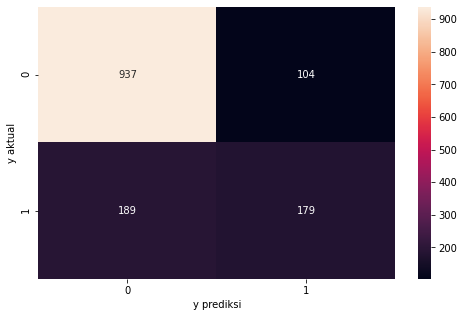

In [339]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRFGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [340]:
print(classification_report(yRF1_test,y_predRFGS1))

precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [341]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRFGS1)*100,recall_score(yRF1_test,y_predRFGS1)*100,precision_score(yRF1_test,y_predRFGS1)*100,roc_auc_score(yRF1_test,y_predRFGS1)*100,f1_score(yRF1_test,y_predRFGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.205110
recall,48.641304
precission,63.250883
roc_auc_score,69.325455
F1 Score,54.992320


### All Feature without Parameter Tuning but with Scalling train 90

In [342]:
x_ScalRF = df2_Scal.drop(["Churn"],axis=1)
y_ScalRF = df2_Scal["Churn"]

In [343]:
xScalRF_train, xScalRF_test, yScalRF_train, yScalRF_test = train_test_split(x_ScalRF, y_ScalRF, test_size = 0.1, random_state = 0)

In [344]:
xScalRF1_train, xScalRF1_test, yScalRF1_train, yScalRF1_test = train_test_split(x_ScalRF, y_ScalRF, test_size = 0.1, random_state = 0)

In [345]:
modelRFscal = RandomForestClassifier()
modelRFscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier()

In [346]:
# 10 Folds Cross Validation 
clf_scoreRFScal = cross_val_score(modelRFscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [347]:
y_predRFscal = modelRFscal.predict(xScalRF_test)

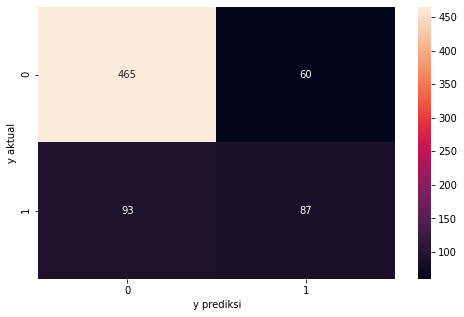

In [348]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [349]:
print(classification_report(yScalRF_test,y_predRFscal))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       525
         1.0       0.59      0.48      0.53       180

    accuracy                           0.78       705
   macro avg       0.71      0.68      0.70       705
weighted avg       0.77      0.78      0.78       705



In [350]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFscal)*100,recall_score(yScalRF_test,y_predRFscal)*100,precision_score(yScalRF_test,y_predRFscal)*100,roc_auc_score(yScalRF_test,y_predRFscal)*100,f1_score(yScalRF_test,y_predRFscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.297872
recall,48.333333
precission,59.183673
roc_auc_score,68.452381
F1 Score,53.211009


### All Feature without Parameter Tuning but with Scalling train 80

In [351]:
modelRFscal1 = RandomForestClassifier()
modelRFscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier()

In [352]:
# 10 Folds Cross Validation 
clf_scoreRFScal1 = cross_val_score(modelRFscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [353]:
y_predRFscal1 = modelRFscal1.predict(xScalRF1_test)

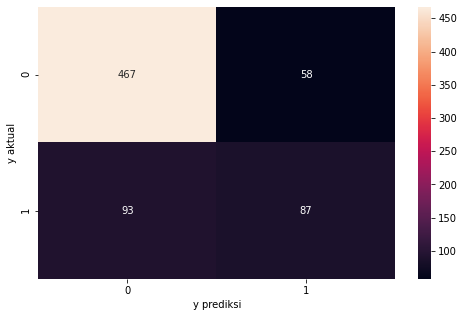

In [354]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [355]:
print(classification_report(yScalRF1_test,y_predRFscal1))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       525
         1.0       0.60      0.48      0.54       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.77      0.79      0.78       705



In [356]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFscal1)*100,recall_score(yScalRF1_test,y_predRFscal1)*100,precision_score(yScalRF1_test,y_predRFscal1)*100,roc_auc_score(yScalRF1_test,y_predRFscal1)*100,f1_score(yScalRF1_test,y_predRFscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.581560
recall,48.333333
precission,60.000000
roc_auc_score,68.642857
F1 Score,53.538462


### All Feature with Parameter Tuning Random Feature and with Scalling train 90

In [357]:
modelRFRSscal = RandomForestClassifier(max_depth=110,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFRSscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [358]:
# 10 Folds Cross Validation 
clf_scoreRFRSScal = cross_val_score(modelRFRSscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [359]:
y_predRFRSscal = modelRFRSscal.predict(xScalRF_test)

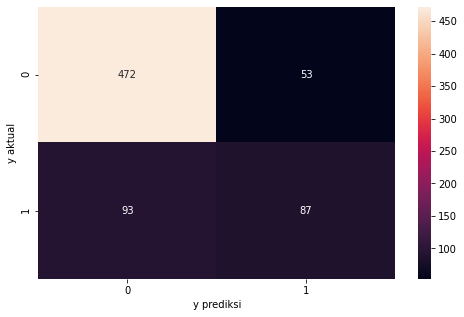

In [360]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [361]:
print(classification_report(yScalRF_test,y_predRFRSscal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       525
         1.0       0.62      0.48      0.54       180

    accuracy                           0.79       705
   macro avg       0.73      0.69      0.70       705
weighted avg       0.78      0.79      0.78       705



In [362]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFRSscal)*100,recall_score(yScalRF_test,y_predRFRSscal)*100,precision_score(yScalRF_test,y_predRFRSscal)*100,roc_auc_score(yScalRF_test,y_predRFRSscal)*100,f1_score(yScalRF_test,y_predRFRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.290780
recall,48.333333
precission,62.142857
roc_auc_score,69.119048
F1 Score,54.375000


### All Feature with Parameter Tuning Random Feature and with Scalling train 80

In [363]:
modelRFRSscal1 = RandomForestClassifier(max_depth=110,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFRSscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [364]:
# 10 Folds Cross Validation 
clf_scoreRFRSScal1 = cross_val_score(modelRFRSscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [365]:
y_predRFRSscal1 = modelRFRSscal1.predict(xScalRF1_test)

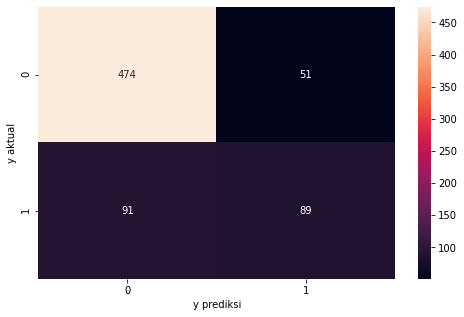

In [366]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [367]:
print(classification_report(yScalRF1_test,y_predRFRSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       525
         1.0       0.64      0.49      0.56       180

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.79      0.80      0.79       705



In [368]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFRSscal1)*100,recall_score(yScalRF1_test,y_predRFRSscal1)*100,precision_score(yScalRF1_test,y_predRFRSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFRSscal1)*100,f1_score(yScalRF1_test,y_predRFRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.858156
recall,49.444444
precission,63.571429
roc_auc_score,69.865079
F1 Score,55.625000


### All Feature with Parameter Tuning Grid Search Feature and with Scalling train 90

In [369]:
modelRFGSscal = RandomForestClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=200)

In [370]:
# 10 Folds Cross Validation 
clf_scoreRFGSScal = cross_val_score(modelRFGSscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [371]:
y_predRFGSscal = modelRFGSscal.predict(xScalRF_test)

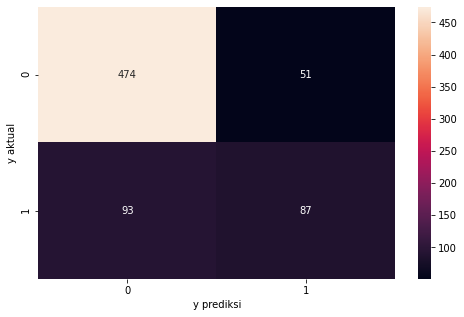

In [372]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFGSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [373]:
print(classification_report(yScalRF_test,y_predRFGSscal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       525
         1.0       0.63      0.48      0.55       180

    accuracy                           0.80       705
   macro avg       0.73      0.69      0.71       705
weighted avg       0.78      0.80      0.79       705



In [374]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFGSscal)*100,recall_score(yScalRF_test,y_predRFGSscal)*100,precision_score(yScalRF_test,y_predRFGSscal)*100,roc_auc_score(yScalRF_test,y_predRFGSscal)*100,f1_score(yScalRF_test,y_predRFGSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.574468
recall,48.333333
precission,63.043478
roc_auc_score,69.309524
F1 Score,54.716981


### All Feature with Parameter Tuning Grid Search Feature and with Scalling train 80

In [375]:
modelRFGSscal1 = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFGSscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [376]:
# 10 Folds Cross Validation 
clf_scoreRFGSScal1 = cross_val_score(modelRFGSscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [377]:
y_predRFGSscal1 = modelRFGSscal1.predict(xScalRF1_test)

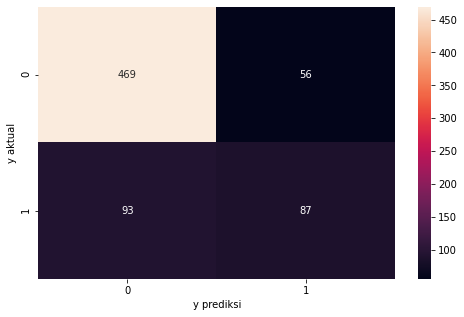

In [378]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFGSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [379]:
print(classification_report(yScalRF1_test,y_predRFGSscal1))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       525
         1.0       0.61      0.48      0.54       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.78      0.79      0.78       705



In [380]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFGSscal1)*100,recall_score(yScalRF1_test,y_predRFGSscal1)*100,precision_score(yScalRF1_test,y_predRFGSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFGSscal1)*100,f1_score(yScalRF1_test,y_predRFGSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.865248
recall,48.333333
precission,60.839161
roc_auc_score,68.833333
F1 Score,53.869969


### Feature Selection without Parameter Tuning and without Scalling train 90

In [381]:
x_selRF = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selRF  = df2["Churn"]

In [382]:
xselRF_train, xselRF_test, yselRF_train, yselRF_test = train_test_split(x_selRF, y_selRF, test_size = 0.1, random_state = 0)

In [383]:
xselRF1_train, xselRF1_test, yselRF1_train, yselRF1_test = train_test_split(x_selRF, y_selRF, test_size = 0.2, random_state = 0)

In [384]:
modelRFsel = RandomForestClassifier()
modelRFsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier()

In [385]:
# 10 Folds Cross Validation 
clf_scoreRFsel= cross_val_score(modelRFsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [386]:
y_predRFsel = modelRFsel.predict(xselRF_test)

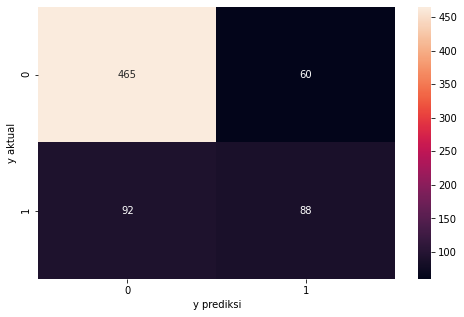

In [387]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [388]:
print(classification_report(yselRF_test,y_predRFsel))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       525
           1       0.59      0.49      0.54       180

    accuracy                           0.78       705
   macro avg       0.71      0.69      0.70       705
weighted avg       0.77      0.78      0.78       705



In [389]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFsel)*100,recall_score(yselRF_test,y_predRFsel)*100,precision_score(yselRF_test,y_predRFsel)*100,roc_auc_score(yselRF_test,y_predRFsel)*100,f1_score(yselRF_test,y_predRFsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.439716
recall,48.888889
precission,59.459459
roc_auc_score,68.730159
F1 Score,53.658537


### Feature Selection without Parameter Tuning and without Scalling train 80

In [390]:
modelRFsel1 = RandomForestClassifier()
modelRFsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier()

In [391]:
# 10 Folds Cross Validation 
clf_scoreRFsel80 = cross_val_score(modelRFsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [392]:
y_predRFsel1 = modelRFsel1.predict(xselRF1_test)

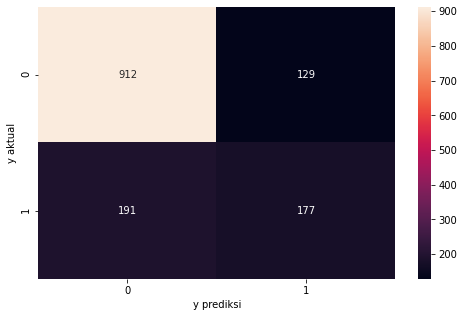

In [393]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [394]:
print(classification_report(yselRF1_test,y_predRFsel1))

precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.58      0.48      0.53       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [395]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFsel1)*100,recall_score(yselRF1_test,y_predRFsel1)*100,precision_score(yselRF1_test,y_predRFsel1)*100,roc_auc_score(yselRF1_test,y_predRFsel1)*100,f1_score(yselRF1_test,y_predRFsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.288857
recall,48.097826
precission,57.843137
roc_auc_score,67.852948
F1 Score,52.522255


### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [396]:
modelRFRSsel = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFRSsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [397]:
# 10 Folds Cross Validation 
clf_scoreRFRSsel = cross_val_score(modelRFRSsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [398]:
y_predRFRSsel = modelRFRSsel.predict(xselRF_test)

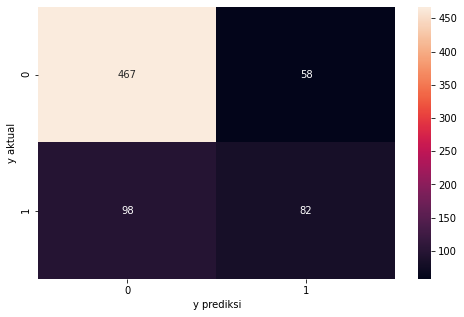

In [399]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [400]:
print(classification_report(yselRF_test,y_predRFRSsel))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       525
           1       0.59      0.46      0.51       180

    accuracy                           0.78       705
   macro avg       0.71      0.67      0.68       705
weighted avg       0.77      0.78      0.77       705



In [401]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFRSsel)*100,recall_score(yselRF_test,y_predRFRSsel)*100,precision_score(yselRF_test,y_predRFRSsel)*100,roc_auc_score(yselRF_test,y_predRFRSsel)*100,f1_score(yselRF_test,y_predRFRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.872340
recall,45.555556
precission,58.571429
roc_auc_score,67.253968
F1 Score,51.250000


### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [402]:
modelRFRSsel1 = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=2,n_estimators=400)
modelRFRSsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400)

In [403]:
# 10 Folds Cross Validation 
clf_scoreRFRSsel80 = cross_val_score(modelRFRSsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [404]:
y_predRFRSsel1 = modelRFRSsel1.predict(xselRF1_test)

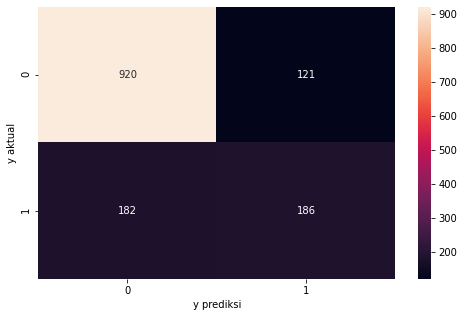

In [405]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [406]:
print(classification_report(yselRF1_test,y_predRFRSsel1))

precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.61      0.51      0.55       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.78      0.78      1409



In [407]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFRSsel1)*100,recall_score(yselRF1_test,y_predRFRSsel1)*100,precision_score(yselRF1_test,y_predRFRSsel1)*100,roc_auc_score(yselRF1_test,y_predRFRSsel1)*100,f1_score(yselRF1_test,y_predRFRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.495387
recall,50.543478
precission,60.586319
roc_auc_score,69.460020
F1 Score,55.111111


### Feature Selection with Parameter Tuning Grid Search and without Scalling train 90

In [408]:
modelRFGSsel = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=200)

In [409]:
# 10 Folds Cross Validation 
clf_scoreRFGSsel = cross_val_score(modelRFGSsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [410]:
y_predRFGSsel = modelRFGSsel.predict(xselRF_test)

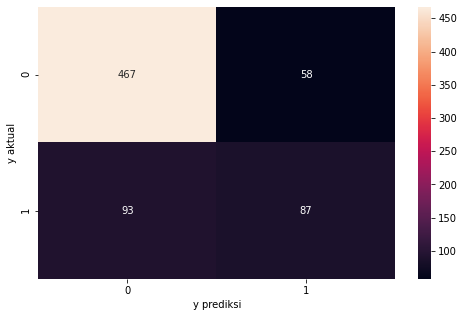

In [411]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFGSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [412]:
print(classification_report(yselRF_test,y_predRFGSsel))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       525
           1       0.60      0.48      0.54       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.77      0.79      0.78       705



In [413]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFGSsel)*100,recall_score(yselRF_test,y_predRFGSsel)*100,precision_score(yselRF_test,y_predRFGSsel)*100,roc_auc_score(yselRF_test,y_predRFGSsel)*100,f1_score(yselRF_test,y_predRFGSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.581560
recall,48.333333
precission,60.000000
roc_auc_score,68.642857
F1 Score,53.538462


### Feature Selection with Parameter Tuning Grid Search and without Scalling train 80

In [414]:
modelRFGSsel1 = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=400)
modelRFGSsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=400)

In [415]:
# 10 Folds Cross Validation 
clf_scoreRFGSsel80 = cross_val_score(modelRFGSsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [416]:
y_predRFGSsel1 = modelRFGSsel1.predict(xselRF1_test)

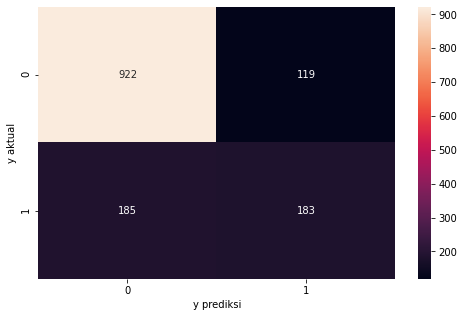

In [417]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFGSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [418]:
print(classification_report(yselRF1_test,y_predRFGSsel1))

precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.50      0.55       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [419]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFGSsel1)*100,recall_score(yselRF1_test,y_predRFGSsel1)*100,precision_score(yselRF1_test,y_predRFGSsel1)*100,roc_auc_score(yselRF1_test,y_predRFGSsel1)*100,f1_score(yselRF1_test,y_predRFGSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.424414
recall,49.728261
precission,60.596026
roc_auc_score,69.148472
F1 Score,54.626866


### Feature Selection without Parameter Tuning but with Scalling train 90

In [420]:
x_selRFscal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selRFscal  = df2_Scal["Churn"]

In [421]:
xselRFscal_train, xselRFscal_test, yselRFscal_train, yselRFscal_test = train_test_split(x_selRFscal, y_selRFscal, test_size = 0.1, random_state = 0)

In [422]:
xselRFscal1_train, xselRFscal1_test, yselRFscal1_train, yselRFscal1_test = train_test_split(x_selRFscal, y_selRFscal, test_size = 0.2, random_state = 0)

In [423]:
modelRFselscal = RandomForestClassifier()
modelRFselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier()

In [424]:
# 10 Folds Cross Validation 
clf_scoreRFselscal = cross_val_score(modelRFselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [425]:
y_predRFselscal = modelRFselscal.predict(xselRFscal_test)

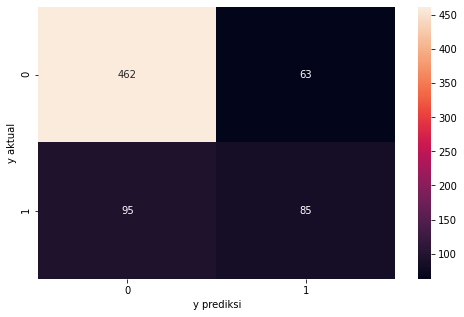

In [426]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [427]:
print(classification_report(yselRFscal_test,y_predRFselscal))

precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       525
         1.0       0.57      0.47      0.52       180

    accuracy                           0.78       705
   macro avg       0.70      0.68      0.69       705
weighted avg       0.76      0.78      0.77       705



In [428]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFselscal)*100,recall_score(yselRF_test,y_predRFselscal)*100,precision_score(yselRFscal_test,y_predRFselscal)*100,roc_auc_score(yselRFscal_test,y_predRFselscal)*100,f1_score(yselRF_test,y_predRFselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.588652
recall,47.222222
precission,57.432432
roc_auc_score,67.611111
F1 Score,51.829268


### Feature Selection without Parameter Tuning but with Scalling train 80

In [429]:
modelRFselscal1 = RandomForestClassifier()
modelRFselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier()

In [430]:
# 10 Folds Cross Validation 
clf_scoreRFselscal1 = cross_val_score(modelRFselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [431]:
y_predRFselscal1 = modelRFselscal1.predict(xselRFscal1_test)

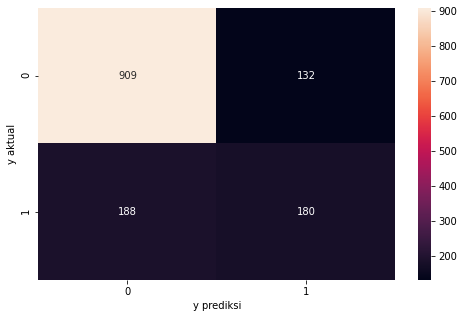

In [432]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [433]:
print(classification_report(yselRFscal1_test,y_predRFselscal1))

precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1041
         1.0       0.58      0.49      0.53       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [434]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFselscal1)*100,recall_score(yselRF1_test,y_predRFselscal1)*100,precision_score(yselRFscal1_test,y_predRFselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFselscal1)*100,f1_score(yselRF1_test,y_predRFselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.288857
recall,48.913043
precission,57.692308
roc_auc_score,68.116464
F1 Score,52.941176


### Feature Selection with Parameter Tuning Random Search and with Scalling train 90

In [435]:
modelRFRSselscal = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=4,n_estimators=90)
modelRFRSselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=90)

In [436]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal = cross_val_score(modelRFRSselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [437]:
y_predRFRSselscal = modelRFRSselscal.predict(xselRFscal_test)

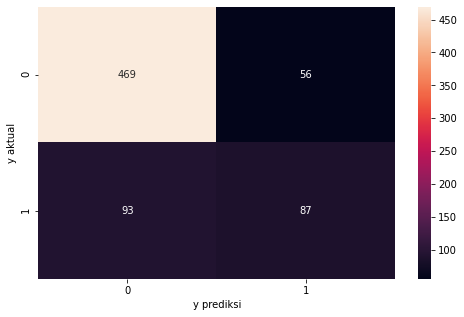

In [438]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [439]:
print(classification_report(yselRFscal_test,y_predRFRSselscal))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       525
         1.0       0.61      0.48      0.54       180

    accuracy                           0.79       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.78      0.79      0.78       705



In [440]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFRSselscal)*100,recall_score(yselRF_test,y_predRFRSselscal)*100,precision_score(yselRFscal_test,y_predRFRSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFRSselscal)*100,f1_score(yselRF_test,y_predRFRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.865248
recall,48.333333
precission,60.839161
roc_auc_score,68.833333
F1 Score,53.869969


### Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [441]:
modelRFRSselscal1 = RandomForestClassifier(max_depth=80,min_samples_split=10,min_samples_leaf=2,n_estimators=1000)
modelRFRSselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [442]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal80 = cross_val_score(modelRFRSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [443]:
y_predRFRSselscal1 = modelRFRSselscal1.predict(xselRFscal1_test)

In [444]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal80 = cross_val_score(modelRFRSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [445]:
y_predRFRSselscal1 = modelRFRSselscal1.predict(xselRFscal1_test)

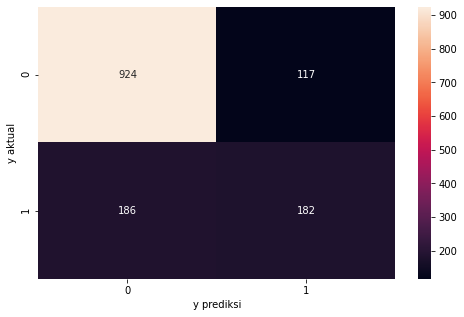

In [446]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [447]:
print(classification_report(yselRFscal1_test,y_predRFRSselscal1))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1041
         1.0       0.61      0.49      0.55       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [448]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFRSselscal1)*100,recall_score(yselRF1_test,y_predRFRSselscal1)*100,precision_score(yselRFscal1_test,y_predRFRSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFRSselscal1)*100,f1_score(yselRF1_test,y_predRFRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.495387
recall,49.456522
precission,60.869565
roc_auc_score,69.108664
F1 Score,54.572714


In [449]:
### Feature Selection with Parameter Tuning Grid Search and with Scalling train 90

In [450]:
modelRFGSselscal = RandomForestClassifier(max_depth=110,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFGSselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [451]:
 #10 Folds Cross Validation 
clf_scoreRFGSselscal = cross_val_score(modelRFGSselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [452]:
y_predRFGSselscal = modelRFGSselscal.predict(xselRFscal_test)

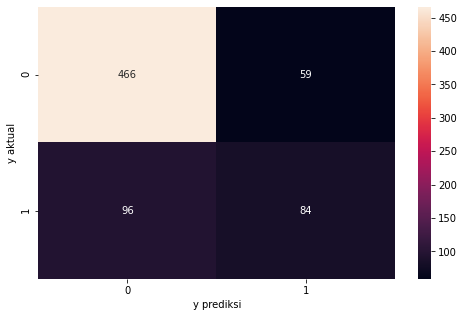

In [453]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFGSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [454]:
print(classification_report(yselRFscal_test,y_predRFGSselscal))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       525
         1.0       0.59      0.47      0.52       180

    accuracy                           0.78       705
   macro avg       0.71      0.68      0.69       705
weighted avg       0.77      0.78      0.77       705



In [455]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.014184
recall,46.666667
precission,58.741259
roc_auc_score,67.714286
F1 Score,52.012384


### Feature Selection with Parameter Tuning Grid Search and with Scalling train 80

In [456]:
modelRFGSselscal1 = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=200)

In [457]:
 #10 Folds Cross Validation 
clf_scoreRFGSselscal80 = cross_val_score(modelRFGSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [458]:
y_predRFGSselscal1 = modelRFGSselscal1.predict(xselRFscal1_test)

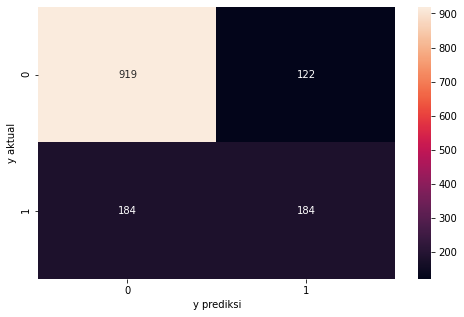

In [459]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFGSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [460]:
print(classification_report(yselRFscal1_test,y_predRFGSselscal1))

precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1041
         1.0       0.60      0.50      0.55       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [461]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFGSselscal1)*100,recall_score(yselRF1_test,y_predRFGSselscal1)*100,precision_score(yselRFscal1_test,y_predRFGSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFGSselscal1)*100,f1_score(yselRF1_test,y_predRFGSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,78.282470
recall,50.000000
precission,60.130719
roc_auc_score,69.140250
F1 Score,54.599407


In [462]:
Logreg_Summary = pd.DataFrame({"Random Forest": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yRF1_test,y_predRF1)*100,recall_score(yRF1_test,y_predRF1)*100,precision_score(yRF1_test,y_predRF1)*100,roc_auc_score(yRF1_test,y_predRF1)*100,f1_score(yRF1_test,y_predRF1)*100],
                                "All Feature with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yRF_test,y_predRFRS)*100,recall_score(yRF_test,y_predRFRS)*100,precision_score(yRF_test,y_predRFRS)*100,roc_auc_score(yRF_test,y_predRFRS)*100,f1_score(yRF_test,y_predRFRS)*100],
                                "All Feature with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yRF1_test,y_predRFRS1)*100,recall_score(yRF1_test,y_predRFRS1)*100,precision_score(yRF1_test,y_predRFRS1)*100,roc_auc_score(yRF1_test,y_predRFRS1)*100,f1_score(yRF1_test,y_predRFRS1)*100],
                                "All Feature with Parameter Tuning Grid Search and without Scalling train 90":[accuracy_score(yRF_test,y_predRFGS)*100,recall_score(yRF_test,y_predRFGS)*100,precision_score(yRF_test,y_predRFGS)*100,roc_auc_score(yRF_test,y_predRFGS)*100,f1_score(yRF_test,y_predRFGS)*100],
                                 "All Feature with Parameter Tuning Grid Search and without Scalling train 80":[accuracy_score(yRF1_test,y_predRFGS1)*100,recall_score(yRF1_test,y_predRFGS1)*100,precision_score(yRF1_test,y_predRFGS1)*100,roc_auc_score(yRF1_test,y_predRFGS1)*100,f1_score(yRF1_test,y_predRFGS1)*100],
                                  "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFscal)*100,recall_score(yScalRF_test,y_predRFscal)*100,precision_score(yScalRF_test,y_predRFscal)*100,roc_auc_score(yScalRF_test,y_predRFscal)*100,f1_score(yScalRF_test,y_predRFscal)*100],
                                  "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFscal1)*100,recall_score(yScalRF1_test,y_predRFscal1)*100,precision_score(yScalRF1_test,y_predRFscal1)*100,roc_auc_score(yScalRF1_test,y_predRFscal1)*100,f1_score(yScalRF1_test,y_predRFscal1)*100],
                                  "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFRSscal)*100,recall_score(yScalRF_test,y_predRFRSscal)*100,precision_score(yScalRF_test,y_predRFRSscal)*100,roc_auc_score(yScalRF_test,y_predRFRSscal)*100,f1_score(yScalRF_test,y_predRFRSscal)*100],
                                  "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFRSscal1)*100,recall_score(yScalRF1_test,y_predRFRSscal1)*100,precision_score(yScalRF1_test,y_predRFRSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFRSscal1)*100,f1_score(yScalRF1_test,y_predRFRSscal1)*100],
                                  "All Feature with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFGSscal)*100,recall_score(yScalRF_test,y_predRFGSscal)*100,precision_score(yScalRF_test,y_predRFGSscal)*100,roc_auc_score(yScalRF_test,y_predRFGSscal)*100,f1_score(yScalRF_test,y_predRFGSscal)*100],
                                  "All Feature with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFGSscal1)*100,recall_score(yScalRF1_test,y_predRFGSscal1)*100,precision_score(yScalRF1_test,y_predRFGSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFGSscal1)*100,f1_score(yScalRF1_test,y_predRFGSscal1)*100],
                                  "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFsel)*100,recall_score(yselRF_test,y_predRFsel)*100,precision_score(yselRF_test,y_predRFsel)*100,roc_auc_score(yselRF_test,y_predRFsel)*100,f1_score(yselRF_test,y_predRFsel)*100],
                                   "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFsel1)*100,recall_score(yselRF1_test,y_predRFsel1)*100,precision_score(yselRF1_test,y_predRFsel1)*100,roc_auc_score(yselRF1_test,y_predRFsel1)*100,f1_score(yselRF1_test,y_predRFsel1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFRSsel)*100,recall_score(yselRF_test,y_predRFRSsel)*100,precision_score(yselRF_test,y_predRFRSsel)*100,roc_auc_score(yselRF_test,y_predRFRSsel)*100,f1_score(yselRF_test,y_predRFRSsel)*100],
                                   "Feature Selection with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFRSsel1)*100,recall_score(yselRF1_test,y_predRFRSsel1)*100,precision_score(yselRF1_test,y_predRFRSsel1)*100,roc_auc_score(yselRF1_test,y_predRFRSsel1)*100,f1_score(yselRF1_test,y_predRFRSsel1)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSsel)*100,recall_score(yselRF_test,y_predRFGSsel)*100,precision_score(yselRF_test,y_predRFGSsel)*100,roc_auc_score(yselRF_test,y_predRFGSsel)*100,f1_score(yselRF_test,y_predRFGSsel)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFGSsel1)*100,recall_score(yselRF1_test,y_predRFGSsel1)*100,precision_score(yselRF1_test,y_predRFGSsel1)*100,roc_auc_score(yselRF1_test,y_predRFGSsel1)*100,f1_score(yselRF1_test,y_predRFGSsel1)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselRF_test,y_predRFselscal)*100,recall_score(yselRF_test,y_predRFselscal)*100,precision_score(yselRFscal_test,y_predRFselscal)*100,roc_auc_score(yselRFscal_test,y_predRFselscal)*100,f1_score(yselRF_test,y_predRFselscal)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselRF1_test,y_predRFselscal1)*100,recall_score(yselRF1_test,y_predRFselscal1)*100,precision_score(yselRFscal1_test,y_predRFselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFselscal1)*100,f1_score(yselRF1_test,y_predRFselscal1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and Scalling train 90": [accuracy_score(yselRF_test,y_predRFRSselscal)*100,recall_score(yselRF_test,y_predRFRSselscal)*100,precision_score(yselRFscal_test,y_predRFRSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFRSselscal)*100,f1_score(yselRF_test,y_predRFRSselscal)*100],
                                   "Feature Selection with Parameter Tuning Random Search and Scalling train 80":[accuracy_score(yselRF1_test,y_predRFRSselscal1)*100,recall_score(yselRF1_test,y_predRFRSselscal1)*100,precision_score(yselRFscal1_test,y_predRFRSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFRSselscal1)*100,f1_score(yselRF1_test,y_predRFRSselscal1)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yselRF1_test,y_predRFGSselscal1)*100,recall_score(yselRF1_test,y_predRFGSselscal1)*100,precision_score(yselRFscal1_test,y_predRFGSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFGSselscal1)*100,f1_score(yselRF1_test,y_predRFGSselscal1)*100]
                                 


})
c = Logreg_Summary.set_index("Random Forest").T
c   

Random Forest,accuracy,recall,precision,roc_auc_score,f1_score
All Feature without Parameter Tuning and without Scalling train 90,77.730496,47.222222,57.823129,67.706349,51.987768
All Feature without Parameter Tuning and without Scalling train 80,77.714691,47.826087,59.060403,68.053293,52.852853
All Feature with Parameter Tuning Random Search and without Scalling train 90,79.290780,50.555556,61.486486,69.849206,55.487805
All Feature with Parameter Tuning Random Search and without Scalling train 80,78.992193,47.826087,62.857143,68.917847,54.320988
All Feature with Parameter Tuning Grid Search and without Scalling train 90,78.723404,47.777778,60.563380,68.555556,53.416149
All Feature with Parameter Tuning Grid Search and without Scalling train 80,79.205110,48.641304,63.250883,69.325455,54.992320
All Feature without Parameter Tuning but with Scalling train 90,78.297872,48.333333,59.183673,68.452381,53.211009
All Feature without Parameter Tuning but with Scalling train 80,78.581560,48.333333,60.000000,68.642857,53.538462
All Feature with Parameter Tuning Random Search and with Scalling train 90,79.290780,48.333333,62.142857,69.119048,54.375000
All Feature with Parameter Tuning Random Search and with Scalling train 80,79.858156,49.444444,63.571429,69.865079,55.625000


<hr>
<hr>

# XGB Classifier

In [517]:
df_XGB = df2.copy()

In [518]:
xXGB = df_XGB.drop(["Churn"],axis=1)
yXGB = df_XGB["Churn"]

In [519]:
xXGB_train, xXGB_test, yXGB_train, yXGB_test = train_test_split(xXGB, yXGB, test_size = 0.1, random_state = 0)

In [530]:
xXGB1_train, xXGB1_test, yXGB1_train, yXGB1_test = train_test_split(xXGB, yXGB, test_size = 0.2, random_state = 0)

In [521]:
modelXGB = XGBClassifier()
modelXGB.fit(xXGB_train,yXGB_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### All Feature without Parameter Tuning and without Scalling train 90

In [523]:
 #10 Folds Cross Validation 
clf_scoreXGB = cross_val_score(modelXGB, xXGB_train, yXGB_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [526]:
y_predXGB = modelXGB.predict(xXGB_test)

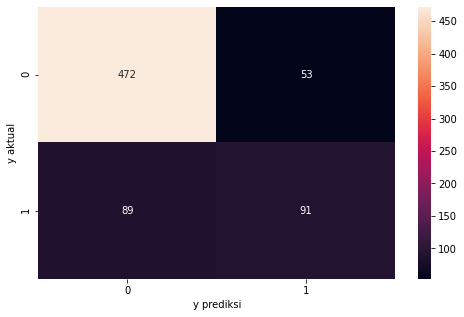

In [527]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB_test,y_predXGB),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [528]:
print(classification_report(yXGB_test,y_predXGB))

precision    recall  f1-score   support

           0       0.84      0.90      0.87       525
           1       0.63      0.51      0.56       180

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.72       705
weighted avg       0.79      0.80      0.79       705



In [529]:
pd.DataFrame(data= [accuracy_score(yXGB_test,y_predXGB)*100,recall_score(yXGB_test,y_predXGB)*100,precision_score(yXGB_test,y_predXGB)*100,roc_auc_score(yXGB_test,y_predXGB)*100,f1_score(yXGB_test,y_predXGB)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,79.858156
recall,50.555556
precission,63.194444
roc_auc_score,70.230159
F1 Score,56.172840


### All Feature without Parameter Tuning and without Scalling train 80

In [533]:
modelXGB1 = XGBClassifier()
modelXGB1.fit(xXGB1_train,yXGB1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [534]:
 #10 Folds Cross Validation 
clf_scoreXGB1 = cross_val_score(modelXGB1, xXGB1_train, yXGB1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79652997 0.80757098 0.80757098 0.8044164  0.80126183 0.82334385
 0.79810726 0.78706625 0.79936809 0.81516588]


0.80404014731313

In [535]:
y_predXGB1 = modelXGB1.predict(xXGB1_test)

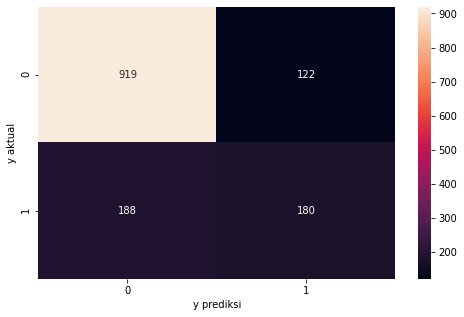

In [536]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB1_test,y_predXGB1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [537]:
print(classification_report(yXGB1_test,y_predXGB1))

precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.60      0.49      0.54       368

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [538]:
pd.DataFrame(data= [accuracy_score(yXGB1_test,y_predXGB1)*100,recall_score(yXGB1_test,y_predXGB1)*100,precision_score(yXGB1_test,y_predXGB1)*100,roc_auc_score(yXGB1_test,y_predXGB1)*100,f1_score(yXGB1_test,y_predXGB1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,77.998581
recall,48.913043
precission,59.602649
roc_auc_score,68.596771
F1 Score,53.731343
